In [75]:
# This is a code to implement multivariate linear regression on boston dataset from scratch

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

import sklearn.preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [186]:
dataset = load_boston()
print(dataset.data.shape)
print(dataset.target.shape)
print(dataset.DESCR)

(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher rat

In [79]:
print(dataset.keys())
print(dataset['feature_names'])

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [167]:
x = dataset.data
y = dataset.target

df = pd.DataFrame(x)
df.columns = dataset.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [168]:
#adding target variable to our dataframe
df['PRICE'] = y

# finding correlation between attributes and target variable
print(np.corrcoef(np.transpose(df))[-1, :])

df.head()

[-0.38583169  0.36044534 -0.48372516  0.17526018 -0.42732077  0.69535995
 -0.37695457  0.24992873 -0.38162623 -0.46853593 -0.50778669  0.33346082
 -0.73766273  1.        ]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [169]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [170]:
# normalising the dataset

df =(df - df.mean() )/ df.std()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.417300,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.414859,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.414861,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.414270,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.410003,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


In [194]:
#multi variate linear regression

n = 13

np.random.seed(123)

# initialising theta with zeros 
theta = np.zeros((1, x.shape[1] + 1))
print(theta.shape)

# creating bias vector x0
x0 = np.ones((x.shape[0], 1))

# forming input variable
X = np.concatenate((x0, x), axis = 1)
print(X.shape)
# print(X)

print(theta)

(1, 14)
(506, 14)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [188]:
def train_test_splitt(dataset, ratio = 0.7):
    m = len(df)
    
    #if ratio to be divided is given in percentage, multiply with 0.01
    if ratio > 1:
        train_ratio = int(ratio * 0.01 * m)
    else:
        train_ratio = int(ratio * m)

    x_train = dataset.iloc[:train_ratio, :-1]
    x_test = dataset.iloc[train_ratio: , :-1]
    
    y_train = dataset.iloc[:train_ratio, -1:]
    y_test = dataset.iloc[train_ratio: , -1:]
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

# print(x_train.head())
print(df.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(x_train))

(506, 14)
(354, 14)
(152, 14)
(354, 1)
(152, 1)
<class 'numpy.ndarray'>


In [189]:
# generating hypothesis, h
h = x_train.dot(theta.T)

print(h.shape)
print(y_train.shape)

# printing overall loss
# print("\nLOSS: ", np.array((h - y_train).T))
print(np.sum(abs((h - y_train)) / len(X)))


(354,)
(354, 1)
88667.47884205189


In [190]:
def cost_function(X, y, theta):
    tobesummed = np.power( ((X@theta.T)-y), 2)
    return np.sum(tobesummed)/(2*len(X))

#     return h, np.sum(loss ** 2) / (2 * len(X))

# For testing the function
cost = cost_function(x_train, y_train, theta)
print(cost)
# print(cost.shape)
# print(h.shape)

23508075.10716715


In [192]:
def grad_descent(X, y, theta, alpha):
    h = X.dot(theta.T)
    loss = h - y
    dj = (loss.T).dot(X)
    theta = theta - (alpha/len(X)) * dj
#     theta = theta - (alpha/len(X)) * np.sum(X * (X@theta.T - y), axis =0)
    return theta

# For testing the function 
cost = cost_function(x_train, y_train, theta)
print("Cost before: ", cost)

theta = grad_descent(x_train, y_train, theta, 0.0000001)

cost = cost_function(x_train, y_train, theta)
print("Cost after: ", cost)

Cost before:  23508075.10716715
Cost after:  22183573.82114337


In [193]:
def linear_reg(epoch, X, y, theta, alpha):
    for ep in range(epoch):
        
        #calculate new theta
        theta = grad_descent(X, y, theta, alpha)
        
        #compute new loss
        loss = cost_function(X, y, theta)
        print("\nCost function: ", loss)
        
    return theta

# defining hyper parameters

# epochs are the number of times we run our linear regression to minimise the loss
# alpha is the learning rate

#Both epoch and alpha can be changed and tested on different numbers to minimise loss at a different rate(Advisable)
epoch = 100000
alpha = 0.000001

# thetaVec = np.zeros(epoch, 1)
# CostFn = np.zeros(epoch, 1)
theta = linear_reg(epoch, x_train, y_train, theta, alpha)


Cost function:  10468127.690728862

Cost function:  4958154.77848909

Cost function:  2366585.225006132

Cost function:  1147531.5500821965

Cost function:  573972.7458074556

Cost function:  303995.2602600432

Cost function:  176799.02624392125

Cost function:  116760.45727564617

Cost function:  88313.91412290625

Cost function:  74732.75891057208

Cost function:  68150.22578391085

Cost function:  64866.30231365642

Cost function:  63140.5865028107

Cost function:  62154.2815551532

Cost function:  61522.02835676137

Cost function:  61062.3229897384

Cost function:  60689.545085103455

Cost function:  60363.17896497573

Cost function:  60063.93219411831

Cost function:  59782.50382488629

Cost function:  59514.301728931074

Cost function:  59256.95776418917

Cost function:  59009.158763775195

Cost function:  58770.09636496677

Cost function:  58539.207891613245

Cost function:  58316.05413334491

Cost function:  58100.26152204316

Cost function:  57891.494608844485

Cost function:


Cost function:  44219.25606023747

Cost function:  44178.6729108946

Cost function:  44138.15100305256

Cost function:  44097.690220059565

Cost function:  44057.29044627718

Cost function:  44016.9515670429

Cost function:  43976.673468634435

Cost function:  43936.45603823537

Cost function:  43896.299163902404

Cost function:  43856.20273453407

Cost function:  43816.16663984062

Cost function:  43776.1907703154

Cost function:  43736.27501720729

Cost function:  43696.41927249452

Cost function:  43656.62342885932

Cost function:  43616.887379664004

Cost function:  43577.211018927854

Cost function:  43537.594241305065

Cost function:  43498.03694206363

Cost function:  43458.539017065115

Cost function:  43419.1003627454

Cost function:  43379.72087609602

Cost function:  43340.4004546466

Cost function:  43301.13899644781

Cost function:  43261.93640005519

Cost function:  43222.7925645135

Cost function:  43183.70738934198

Cost function:  43144.68077452005

Cost function:  43


Cost function:  35995.667901080225

Cost function:  35967.272035825285

Cost function:  35938.91761575324

Cost function:  35910.6045753563

Cost function:  35882.332849233004

Cost function:  35854.10237208797

Cost function:  35825.91307873182

Cost function:  35797.7649040809

Cost function:  35769.65778315722

Cost function:  35741.59165108814

Cost function:  35713.566443106356

Cost function:  35685.58209454957

Cost function:  35657.63854086045

Cost function:  35629.735717586365

Cost function:  35601.87356037929

Cost function:  35574.05200499554

Cost function:  35546.27098729568

Cost function:  35518.53044324432

Cost function:  35490.83030890997

Cost function:  35463.1705204648

Cost function:  35435.55101418458

Cost function:  35407.971726448384

Cost function:  35380.432593738544

Cost function:  35352.93355264038

Cost function:  35325.47453984209

Cost function:  35298.05549213457

Cost function:  35270.6763464112

Cost function:  35243.337039667764

Cost function: 


Cost function:  29642.496930567057

Cost function:  29623.222524730987

Cost function:  29603.975228808114

Cost function:  29584.755000499517

Cost function:  29565.561797574577

Cost function:  29546.395577870855

Cost function:  29527.256299294

Cost function:  29508.143919817598

Cost function:  29489.058397483117

Cost function:  29469.99969039972

Cost function:  29450.96775674424

Cost function:  29431.962554760998

Cost function:  29412.984042761753

Cost function:  29394.032179125516

Cost function:  29375.106922298528

Cost function:  29356.208230794076

Cost function:  29337.33606319244

Cost function:  29318.49037814073

Cost function:  29299.671134352848

Cost function:  29280.87829060928

Cost function:  29262.111805757082

Cost function:  29243.371638709712

Cost function:  29224.657748446956

Cost function:  29205.970094014796

Cost function:  29187.30863452531

Cost function:  29168.673329156576

Cost function:  29150.064137152527

Cost function:  29131.481017822895



Cost function:  25651.202751485667

Cost function:  25637.437595774267

Cost function:  25623.691011151477

Cost function:  25609.96296907039

Cost function:  25596.2534410299

Cost function:  25582.562398574682

Cost function:  25568.889813295067

Cost function:  25555.235656827026

Cost function:  25541.59990085205

Cost function:  25527.982517097073

Cost function:  25514.383477334424

Cost function:  25500.80275338176

Cost function:  25487.240317101936

Cost function:  25473.69614040301

Cost function:  25460.17019523811

Cost function:  25446.662453605368

Cost function:  25433.172887547873

Cost function:  25419.70146915358

Cost function:  25406.24817055525

Cost function:  25392.812963930337

Cost function:  25379.395821500973

Cost function:  25365.996715533864

Cost function:  25352.61561834019

Cost function:  25339.252502275594

Cost function:  25325.90733974007

Cost function:  25312.580103177894

Cost function:  25299.270765077566

Cost function:  25285.9792979717

Cost 


Cost function:  22841.066137446167

Cost function:  22831.008431074508

Cost function:  22820.963643135772

Cost function:  22810.93175412978

Cost function:  22800.912744587455

Cost function:  22790.906595070708

Cost function:  22780.91328617251

Cost function:  22770.932798516704

Cost function:  22760.965112758047

Cost function:  22751.010209582135

Cost function:  22741.068069705336

Cost function:  22731.138673874764

Cost function:  22721.222002868217

Cost function:  22711.318037494122

Cost function:  22701.426758591493

Cost function:  22691.548147029876

Cost function:  22681.682183709323

Cost function:  22671.828849560305

Cost function:  22661.988125543674

Cost function:  22652.15999265065

Cost function:  22642.344431902693

Cost function:  22632.541424351548

Cost function:  22622.750951079124

Cost function:  22612.972993197476

Cost function:  22603.207531848762

Cost function:  22593.454548205165

Cost function:  22583.714023468863

Cost function:  22573.98593887


Cost function:  20720.06695393335

Cost function:  20712.65980849212

Cost function:  20705.261621917783

Cost function:  20697.87238099688

Cost function:  20690.492072536825

Cost function:  20683.120683365858

Cost function:  20675.75820033304

Cost function:  20668.404610308204

Cost function:  20661.059900181906

Cost function:  20653.724056865412

Cost function:  20646.39706729067

Cost function:  20639.078918410247

Cost function:  20631.769597197337

Cost function:  20624.469090645674

Cost function:  20617.177385769555

Cost function:  20609.894469603772

Cost function:  20602.620329203586

Cost function:  20595.35495164469

Cost function:  20588.0983240232

Cost function:  20580.85043345557

Cost function:  20573.611267078628

Cost function:  20566.380812049494

Cost function:  20559.159055545537

Cost function:  20551.945984764403

Cost function:  20544.74158692392

Cost function:  20537.545849262096

Cost function:  20530.358759037084

Cost function:  20523.180303527144

C


Cost function:  19094.11303728489

Cost function:  19088.607924898293

Cost function:  19083.10900313602

Cost function:  19077.616263134103

Cost function:  19072.129696042415

Cost function:  19066.64929302464

Cost function:  19061.17504525823

Cost function:  19055.70694393445

Cost function:  19050.24498025826

Cost function:  19044.789145448372

Cost function:  19039.339430737196

Cost function:  19033.89582737081

Cost function:  19028.45832660895

Cost function:  19023.026919725

Cost function:  19017.60159800594

Cost function:  19012.18235275234

Cost function:  19006.769175278354

Cost function:  19001.362056911676

Cost function:  18995.960988993513

Cost function:  18990.56596287859

Cost function:  18985.176969935106

Cost function:  18979.79400154472

Cost function:  18974.41704910252

Cost function:  18969.046104017034

Cost function:  18963.681157710158

Cost function:  18958.32220161718

Cost function:  18952.96922718671

Cost function:  18947.62222588072

Cost funct


Cost function:  17889.74557405733

Cost function:  17885.544540910018

Cost function:  17881.347860882062

Cost function:  17877.15552795807

Cost function:  17872.967536131902

Cost function:  17868.783879406652

Cost function:  17864.604551794622

Cost function:  17860.42954731733

Cost function:  17856.25886000548

Cost function:  17852.092483898945

Cost function:  17847.93041304676

Cost function:  17843.772641507097

Cost function:  17839.619163347266

Cost function:  17835.4699726437

Cost function:  17831.325063481916

Cost function:  17827.18442995652

Cost function:  17823.048066171203

Cost function:  17818.9159662387

Cost function:  17814.78812428078

Cost function:  17810.664534428277

Cost function:  17806.545190820983

Cost function:  17802.430087607732

Cost function:  17798.319218946326

Cost function:  17794.212579003542

Cost function:  17790.11016195511

Cost function:  17786.011961985703

Cost function:  17781.917973288902

Cost function:  17777.828190067237

Cos


Cost function:  16934.720840515165

Cost function:  16931.467177370054

Cost function:  16928.216584008645

Cost function:  16924.969056371356

Cost function:  16921.724590404745

Cost function:  16918.483182061467

Cost function:  16915.244827300296

Cost function:  16912.00952208608

Cost function:  16908.77726238975

Cost function:  16905.548044188305

Cost function:  16902.321863464833

Cost function:  16899.09871620844

Cost function:  16895.87859841429

Cost function:  16892.66150608358

Cost function:  16889.447435223527

Cost function:  16886.236381847375

Cost function:  16883.028341974346

Cost function:  16879.82331162968

Cost function:  16876.6212868446

Cost function:  16873.42226365628

Cost function:  16870.226238107894

Cost function:  16867.033206248554

Cost function:  16863.843164133323

Cost function:  16860.656107823197

Cost function:  16857.4720333851

Cost function:  16854.290936891888

Cost function:  16851.11281442232

Cost function:  16847.937662061042

Cos


Cost function:  16212.510983196824

Cost function:  16209.908273073534

Cost function:  16207.307791189467

Cost function:  16204.709534740505

Cost function:  16202.113500926636

Cost function:  16199.519686951991

Cost function:  16196.928090024805

Cost function:  16194.338707357434

Cost function:  16191.751536166332

Cost function:  16189.16657367205

Cost function:  16186.583817099227

Cost function:  16184.003263676592

Cost function:  16181.42491063695

Cost function:  16178.848755217183

Cost function:  16176.274794658222

Cost function:  16173.703026205072

Cost function:  16171.133447106791

Cost function:  16168.566054616465

Cost function:  16166.000845991239

Cost function:  16163.43781849228

Cost function:  16160.87696938479

Cost function:  16158.318295937985

Cost function:  16155.761795425098

Cost function:  16153.207465123367

Cost function:  16150.655302314035

Cost function:  16148.105304282335

Cost function:  16145.557468317491

Cost function:  16143.011791712


Cost function:  15620.335911253133

Cost function:  15618.215929861426

Cost function:  15616.097585110936

Cost function:  15613.98087505745

Cost function:  15611.865797759547

Cost function:  15609.752351278574

Cost function:  15607.640533678647

Cost function:  15605.530343026661

Cost function:  15603.42177739227

Cost function:  15601.314834847886

Cost function:  15599.209513468668

Cost function:  15597.105811332545

Cost function:  15595.003726520186

Cost function:  15592.90325711499

Cost function:  15590.804401203108

Cost function:  15588.70715687342

Cost function:  15586.611522217536

Cost function:  15584.517495329788

Cost function:  15582.42507430724

Cost function:  15580.334257249644

Cost function:  15578.245042259512

Cost function:  15576.15742744203

Cost function:  15574.071410905086

Cost function:  15571.98699075929

Cost function:  15569.904165117923

Cost function:  15567.822932096982

Cost function:  15565.743289815144

Cost function:  15563.665236393748


Cost function:  15124.360699011135

Cost function:  15122.604443726594

Cost function:  15120.849405941446

Cost function:  15119.095584301394

Cost function:  15117.342977454015

Cost function:  15115.591584048752

Cost function:  15113.841402736904

Cost function:  15112.092432171641

Cost function:  15110.34467100798

Cost function:  15108.598117902804

Cost function:  15106.852771514834

Cost function:  15105.108630504648

Cost function:  15103.365693534666

Cost function:  15101.623959269167

Cost function:  15099.883426374243

Cost function:  15098.144093517849

Cost function:  15096.405959369755

Cost function:  15094.669022601576

Cost function:  15092.933281886757

Cost function:  15091.198735900552

Cost function:  15089.465383320061

Cost function:  15087.733222824196

Cost function:  15086.002253093679

Cost function:  15084.272472811053

Cost function:  15082.543880660676

Cost function:  15080.81647532872

Cost function:  15079.09025550315

Cost function:  15077.36521987


Cost function:  14694.784769705402

Cost function:  14693.310810202704

Cost function:  14691.83776485616

Cost function:  14690.36563272172

Cost function:  14688.894412856547

Cost function:  14687.424104319089

Cost function:  14685.954706169005

Cost function:  14684.486217467213

Cost function:  14683.018637275862

Cost function:  14681.551964658338

Cost function:  14680.08619867927

Cost function:  14678.621338404497

Cost function:  14677.157382901114

Cost function:  14675.69433123744

Cost function:  14674.232182483007

Cost function:  14672.770935708591

Cost function:  14671.310589986175

Cost function:  14669.851144388978

Cost function:  14668.392597991426

Cost function:  14666.934949869179

Cost function:  14665.478199099098

Cost function:  14664.022344759269

Cost function:  14662.567385928982

Cost function:  14661.113321688741

Cost function:  14659.66015112027

Cost function:  14658.207873306483

Cost function:  14656.756487331502

Cost function:  14655.3059922806


Cost function:  14369.102684277745

Cost function:  14367.821484587119

Cost function:  14366.541006410425

Cost function:  14365.261249052515

Cost function:  14363.98221181912

Cost function:  14362.703894016868

Cost function:  14361.426294953222

Cost function:  14360.149413936551

Cost function:  14358.87325027607

Cost function:  14357.597803281886

Cost function:  14356.32307226496

Cost function:  14355.04905653712

Cost function:  14353.775755411074

Cost function:  14352.503168200377

Cost function:  14351.231294219455

Cost function:  14349.960132783603

Cost function:  14348.689683208962

Cost function:  14347.419944812551

Cost function:  14346.150916912227

Cost function:  14344.88259882672

Cost function:  14343.614989875616

Cost function:  14342.348089379337

Cost function:  14341.081896659181

Cost function:  14339.816411037287

Cost function:  14338.55163183664

Cost function:  14337.287558381096

Cost function:  14336.024189995333

Cost function:  14334.76152600488


Cost function:  14086.475936143022

Cost function:  14085.346902114388

Cost function:  14084.21844782127

Cost function:  14083.09057274304

Cost function:  14081.963276359696

Cost function:  14080.836558151856

Cost function:  14079.710417600778

Cost function:  14078.584854188302

Cost function:  14077.45986739694

Cost function:  14076.33545670977

Cost function:  14075.211621610531

Cost function:  14074.088361583557

Cost function:  14072.965676113798

Cost function:  14071.84356468683

Cost function:  14070.72202678883

Cost function:  14069.601061906606

Cost function:  14068.480669527567

Cost function:  14067.360849139735

Cost function:  14066.241600231746

Cost function:  14065.122922292852

Cost function:  14064.004814812892

Cost function:  14062.887277282338

Cost function:  14061.770309192263

Cost function:  14060.653910034338

Cost function:  14059.538079300853

Cost function:  14058.422816484694

Cost function:  14057.30812107935

Cost function:  14056.193992578921


Cost function:  13814.032622740688

Cost function:  13813.037051285528

Cost function:  13812.041944014698

Cost function:  13811.047300542063

Cost function:  13810.053120481889

Cost function:  13809.05940344891

Cost function:  13808.066149058275

Cost function:  13807.073356925559

Cost function:  13806.081026666796

Cost function:  13805.089157898421

Cost function:  13804.097750237323

Cost function:  13803.106803300812

Cost function:  13802.11631670662

Cost function:  13801.126290072929

Cost function:  13800.136723018335

Cost function:  13799.147615161859

Cost function:  13798.158966122966

Cost function:  13797.170775521536

Cost function:  13796.183042977867

Cost function:  13795.19576811271

Cost function:  13794.208950547214

Cost function:  13793.222589902967

Cost function:  13792.23668580197

Cost function:  13791.251237866665

Cost function:  13790.266245719908

Cost function:  13789.281708984965

Cost function:  13788.297627285552

Cost function:  13787.314000245

Cost function:  13573.321214813399

Cost function:  13572.432975066515

Cost function:  13571.545113334952

Cost function:  13570.65762932662

Cost function:  13569.770522749752

Cost function:  13568.883793312869

Cost function:  13567.997440724823

Cost function:  13567.111464694763

Cost function:  13566.225864932128

Cost function:  13565.34064114669

Cost function:  13564.45579304851

Cost function:  13563.571320347955

Cost function:  13562.687222755701

Cost function:  13561.803499982718

Cost function:  13560.920151740307

Cost function:  13560.037177740036

Cost function:  13559.154577693802

Cost function:  13558.272351313799

Cost function:  13557.39049831251

Cost function:  13556.509018402736

Cost function:  13555.627911297575

Cost function:  13554.747176710423

Cost function:  13553.866814354978

Cost function:  13552.98682394524

Cost function:  13552.107205195507

Cost function:  13551.22795782038

Cost function:  13550.349081534747

Cost function:  13549.470576053815


Cost function:  13367.14057028538

Cost function:  13366.336588915843

Cost function:  13365.532922531249

Cost function:  13364.729570903934

Cost function:  13363.926533806449

Cost function:  13363.12381101157

Cost function:  13362.321402292311

Cost function:  13361.519307421897

Cost function:  13360.717526173778

Cost function:  13359.91605832163

Cost function:  13359.114903639353

Cost function:  13358.314061901066

Cost function:  13357.513532881114

Cost function:  13356.713316354064

Cost function:  13355.913412094704

Cost function:  13355.113819878043

Cost function:  13354.314539479312

Cost function:  13353.515570673966

Cost function:  13352.716913237673

Cost function:  13351.91856694633

Cost function:  13351.120531576049

Cost function:  13350.322806903167

Cost function:  13349.525392704241

Cost function:  13348.728288756036

Cost function:  13347.931494835553

Cost function:  13347.135010719994

Cost function:  13346.338836186796

Cost function:  13345.542971013


Cost function:  13190.088469792288

Cost function:  13189.351359096721

Cost function:  13188.614516420113

Cost function:  13187.877941579816

Cost function:  13187.141634393342

Cost function:  13186.405594678385

Cost function:  13185.66982225279

Cost function:  13184.934316934588

Cost function:  13184.199078541973

Cost function:  13183.464106893307

Cost function:  13182.729401807117

Cost function:  13181.994963102103

Cost function:  13181.260790597129

Cost function:  13180.526884111234

Cost function:  13179.793243463615

Cost function:  13179.059868473638

Cost function:  13178.326758960846

Cost function:  13177.593914744933

Cost function:  13176.861335645777

Cost function:  13176.129021483404

Cost function:  13175.39697207803

Cost function:  13174.665187250004

Cost function:  13173.933666819872

Cost function:  13173.20241060833

Cost function:  13172.471418436246

Cost function:  13171.740690124647

Cost function:  13171.010225494729

Cost function:  13170.28002436


Cost function:  13026.584022426205

Cost function:  13025.904293642374

Cost function:  13025.224794807373

Cost function:  13024.545525772846

Cost function:  13023.866486390585

Cost function:  13023.187676512489

Cost function:  13022.509095990605

Cost function:  13021.830744677092

Cost function:  13021.152622424259

Cost function:  13020.474729084526

Cost function:  13019.797064510445

Cost function:  13019.119628554705

Cost function:  13018.442421070107

Cost function:  13017.765441909603

Cost function:  13017.088690926255

Cost function:  13016.412167973263

Cost function:  13015.735872903944

Cost function:  13015.05980557175

Cost function:  13014.383965830259

Cost function:  13013.70835353318

Cost function:  13013.032968534344

Cost function:  13012.35781068771

Cost function:  13011.682879847367

Cost function:  13011.008175867528

Cost function:  13010.33369860253

Cost function:  13009.659447906844

Cost function:  13008.98542363506

Cost function:  13008.3116256419

Cost function:  12862.820224073372

Cost function:  12862.193873061056

Cost function:  12861.56771847334

Cost function:  12860.941760190255

Cost function:  12860.31599809193

Cost function:  12859.690432058595

Cost function:  12859.065061970583

Cost function:  12858.439887708308

Cost function:  12857.814909152308

Cost function:  12857.190126183194

Cost function:  12856.56553868169

Cost function:  12855.941146528612

Cost function:  12855.31694960487

Cost function:  12854.692947791484

Cost function:  12854.069140969557

Cost function:  12853.445529020291

Cost function:  12852.822111824999

Cost function:  12852.198889265073

Cost function:  12851.575861222012

Cost function:  12850.95302757741

Cost function:  12850.330388212953

Cost function:  12849.707943010439

Cost function:  12849.085691851735

Cost function:  12848.46363461883

Cost function:  12847.841771193805

Cost function:  12847.22010145882

Cost function:  12846.598625296148

Cost function:  12845.977342588154



Cost function:  12717.286660078202

Cost function:  12716.70439094256

Cost function:  12716.12229193911

Cost function:  12715.540362968834

Cost function:  12714.958603932815

Cost function:  12714.377014732185

Cost function:  12713.79559526817

Cost function:  12713.214345442073

Cost function:  12712.633265155268

Cost function:  12712.052354309195

Cost function:  12711.471612805395

Cost function:  12710.891040545463

Cost function:  12710.310637431085

Cost function:  12709.73040336401

Cost function:  12709.15033824607

Cost function:  12708.570441979173

Cost function:  12707.99071446531

Cost function:  12707.41115560652

Cost function:  12706.831765304956

Cost function:  12706.252543462822

Cost function:  12705.673489982402

Cost function:  12705.09460476605

Cost function:  12704.515887716208

Cost function:  12703.937338735395

Cost function:  12703.358957726185

Cost function:  12702.780744591239

Cost function:  12702.202699233307

Cost function:  12701.62482155518




Cost function:  12583.839287860512

Cost function:  12583.29472989563

Cost function:  12582.75032058616

Cost function:  12582.206059849324

Cost function:  12581.661947602399

Cost function:  12581.117983762722

Cost function:  12580.574168247696

Cost function:  12580.030500974784

Cost function:  12579.4869818615

Cost function:  12578.943610825436

Cost function:  12578.40038778423

Cost function:  12577.857312655588

Cost function:  12577.314385357267

Cost function:  12576.771605807098

Cost function:  12576.228973922967

Cost function:  12575.686489622816

Cost function:  12575.14415282465

Cost function:  12574.601963446541

Cost function:  12574.059921406606

Cost function:  12573.518026623038

Cost function:  12572.97627901408

Cost function:  12572.434678498037

Cost function:  12571.893224993279

Cost function:  12571.35191841823

Cost function:  12570.810758691368

Cost function:  12570.269745731253

Cost function:  12569.728879456481

Cost function:  12569.188159785715


Cost function:  12451.10344037399

Cost function:  12450.59387728605

Cost function:  12450.084443779891

Cost function:  12449.575139786448

Cost function:  12449.065965236701

Cost function:  12448.55692006169

Cost function:  12448.04800419249

Cost function:  12447.539217560234

Cost function:  12447.030560096095

Cost function:  12446.522031731303

Cost function:  12446.013632397133

Cost function:  12445.505362024904

Cost function:  12444.997220545984

Cost function:  12444.489207891802

Cost function:  12443.981323993812

Cost function:  12443.473568783536

Cost function:  12442.965942192539

Cost function:  12442.458444152424

Cost function:  12441.951074594856

Cost function:  12441.443833451529

Cost function:  12440.936720654216

Cost function:  12440.429736134703

Cost function:  12439.922879824851

Cost function:  12439.41615165655

Cost function:  12438.909551561745

Cost function:  12438.403079472428

Cost function:  12437.89673532065

Cost function:  12437.390519038481


Cost function:  12337.66513414438

Cost function:  12337.18353353193

Cost function:  12336.702047872064

Cost function:  12336.220677105788

Cost function:  12335.739421174165

Cost function:  12335.258280018284

Cost function:  12334.777253579276

Cost function:  12334.296341798317

Cost function:  12333.81554461662

Cost function:  12333.334861975436

Cost function:  12332.854293816055

Cost function:  12332.373840079812

Cost function:  12331.893500708078

Cost function:  12331.41327564226

Cost function:  12330.933164823813

Cost function:  12330.45316819422

Cost function:  12329.97328569502

Cost function:  12329.49351726777

Cost function:  12329.01386285409

Cost function:  12328.534322395624

Cost function:  12328.05489583405

Cost function:  12327.575583111106

Cost function:  12327.096384168548

Cost function:  12326.617298948184

Cost function:  12326.13832739186

Cost function:  12325.659469441458

Cost function:  12325.1807250389

Cost function:  12324.702094126145

Cos


Cost function:  12211.624378550148

Cost function:  12211.171795563472

Cost function:  12210.719312950203

Cost function:  12210.266930661017

Cost function:  12209.81464864663

Cost function:  12209.362466857776

Cost function:  12208.910385245234

Cost function:  12208.458403759807

Cost function:  12208.00652235234

Cost function:  12207.554740973685

Cost function:  12207.103059574762

Cost function:  12206.651478106493

Cost function:  12206.199996519847

Cost function:  12205.748614765827

Cost function:  12205.297332795453

Cost function:  12204.846150559792

Cost function:  12204.395068009931

Cost function:  12203.944085096993

Cost function:  12203.49320177214

Cost function:  12203.04241798656

Cost function:  12202.59173369147

Cost function:  12202.141148838113

Cost function:  12201.690663377783

Cost function:  12201.24027726179

Cost function:  12200.789990441477

Cost function:  12200.339802868228

Cost function:  12199.88971449344

Cost function:  12199.439725268567


Cost function:  12105.345278752031

Cost function:  12104.91552992968

Cost function:  12104.485870466591

Cost function:  12104.056300320502

Cost function:  12103.626819449166

Cost function:  12103.197427810375

Cost function:  12102.768125361934

Cost function:  12102.33891206168

Cost function:  12101.909787867482

Cost function:  12101.480752737227

Cost function:  12101.051806628835

Cost function:  12100.622949500257

Cost function:  12100.194181309453

Cost function:  12099.765502014427

Cost function:  12099.336911573197

Cost function:  12098.908409943822

Cost function:  12098.479997084376

Cost function:  12098.051672952952

Cost function:  12097.623437507691

Cost function:  12097.195290706746

Cost function:  12096.767232508299

Cost function:  12096.339262870557

Cost function:  12095.911381751757

Cost function:  12095.483589110154

Cost function:  12095.05588490405

Cost function:  12094.62826909174

Cost function:  12094.200741631581

Cost function:  12093.773302481


Cost function:  12008.774657545498

Cost function:  12008.36439942029

Cost function:  12007.954221597076

Cost function:  12007.544124039237

Cost function:  12007.13410671017

Cost function:  12006.724169573292

Cost function:  12006.31431259205

Cost function:  12005.90453572992

Cost function:  12005.494838950373

Cost function:  12005.08522221693

Cost function:  12004.675685493123

Cost function:  12004.266228742505

Cost function:  12003.85685192866

Cost function:  12003.447555015182

Cost function:  12003.038337965701

Cost function:  12002.629200743859

Cost function:  12002.22014331332

Cost function:  12001.811165637779

Cost function:  12001.402267680947

Cost function:  12000.993449406558

Cost function:  12000.584710778374

Cost function:  12000.17605176017

Cost function:  11999.767472315745

Cost function:  11999.358972408927

Cost function:  11998.95055200356

Cost function:  11998.542211063514

Cost function:  11998.133949552675

Cost function:  11997.725767434964




Cost function:  11908.227484873489

Cost function:  11907.836289672581

Cost function:  11907.445166248399

Cost function:  11907.054114569502

Cost function:  11906.663134604467

Cost function:  11906.272226321898

Cost function:  11905.881389690416

Cost function:  11905.490624678656

Cost function:  11905.099931255267

Cost function:  11904.709309388936

Cost function:  11904.318759048347

Cost function:  11903.928280202219

Cost function:  11903.537872819283

Cost function:  11903.147536868282

Cost function:  11902.757272317993

Cost function:  11902.367079137199

Cost function:  11901.976957294708

Cost function:  11901.58690675935

Cost function:  11901.196927499957

Cost function:  11900.807019485406

Cost function:  11900.417182684563

Cost function:  11900.027417066342

Cost function:  11899.637722599657

Cost function:  11899.24809925344

Cost function:  11898.85854699665

Cost function:  11898.469065798265

Cost function:  11898.079655627273

Cost function:  11897.69031645


Cost function:  11817.455005578822

Cost function:  11817.079982047808

Cost function:  11816.705023343884

Cost function:  11816.330129439752

Cost function:  11815.95530030813

Cost function:  11815.580535921741

Cost function:  11815.205836253337

Cost function:  11814.831201275674

Cost function:  11814.45663096154

Cost function:  11814.082125283721

Cost function:  11813.707684215033

Cost function:  11813.333307728297

Cost function:  11812.958995796362

Cost function:  11812.58474839208

Cost function:  11812.210565488329

Cost function:  11811.836447058

Cost function:  11811.462393074

Cost function:  11811.08840350925

Cost function:  11810.714478336684

Cost function:  11810.34061752926

Cost function:  11809.96682105995

Cost function:  11809.593088901742

Cost function:  11809.21942102763

Cost function:  11808.845817410636

Cost function:  11808.472278023797

Cost function:  11808.098802840153

Cost function:  11807.725391832784

Cost function:  11807.352044974756

Cost


Cost function:  11728.168119599228

Cost function:  11727.808082823145

Cost function:  11727.448104688538

Cost function:  11727.088185171711

Cost function:  11726.728324248998

Cost function:  11726.36852189673

Cost function:  11726.008778091262

Cost function:  11725.649092808948

Cost function:  11725.289466026179

Cost function:  11724.929897719341

Cost function:  11724.57038786484

Cost function:  11724.210936439094

Cost function:  11723.851543418537

Cost function:  11723.492208779624

Cost function:  11723.132932498798

Cost function:  11722.773714552546

Cost function:  11722.414554917346

Cost function:  11722.055453569707

Cost function:  11721.696410486136

Cost function:  11721.33742564317

Cost function:  11720.97849901734

Cost function:  11720.619630585214

Cost function:  11720.260820323347

Cost function:  11719.90206820833

Cost function:  11719.543374216757

Cost function:  11719.184738325232

Cost function:  11718.826160510387

Cost function:  11718.4676407488


Cost function:  11638.541295312063

Cost function:  11638.195427809133

Cost function:  11637.849613347655

Cost function:  11637.503851907155

Cost function:  11637.158143467166

Cost function:  11636.812488007228

Cost function:  11636.466885506894

Cost function:  11636.12133594574

Cost function:  11635.775839303336

Cost function:  11635.430395559279

Cost function:  11635.085004693168

Cost function:  11634.73966668462

Cost function:  11634.394381513253

Cost function:  11634.04914915871

Cost function:  11633.703969600638

Cost function:  11633.358842818692

Cost function:  11633.013768792547

Cost function:  11632.668747501892

Cost function:  11632.323778926408

Cost function:  11631.978863045813

Cost function:  11631.633999839822

Cost function:  11631.289189288153

Cost function:  11630.944431370564

Cost function:  11630.599726066797

Cost function:  11630.255073356611

Cost function:  11629.910473219792

Cost function:  11629.565925636118

Cost function:  11629.22143058


Cost function:  11556.00829713852

Cost function:  11555.67474302269

Cost function:  11555.341237297169

Cost function:  11555.007779944091

Cost function:  11554.674370945615

Cost function:  11554.341010283899

Cost function:  11554.00769794112

Cost function:  11553.674433899454

Cost function:  11553.341218141095

Cost function:  11553.00805064824

Cost function:  11552.674931403115

Cost function:  11552.341860387925

Cost function:  11552.008837584912

Cost function:  11551.675862976314

Cost function:  11551.342936544383

Cost function:  11551.01005827138

Cost function:  11550.677228139582

Cost function:  11550.34444613126

Cost function:  11550.011712228712

Cost function:  11549.679026414235

Cost function:  11549.346388670148

Cost function:  11549.01379897876

Cost function:  11548.681257322409

Cost function:  11548.348763683434

Cost function:  11548.016318044183

Cost function:  11547.683920387024

Cost function:  11547.35157069432

Cost function:  11547.019268948447



Cost function:  11476.981387555836

Cost function:  11476.659001217904

Cost function:  11476.33665924133

Cost function:  11476.0143616105

Cost function:  11475.692108309795

Cost function:  11475.369899323605

Cost function:  11475.047734636337

Cost function:  11474.725614232399

Cost function:  11474.403538096209

Cost function:  11474.081506212204

Cost function:  11473.759518564808

Cost function:  11473.437575138472

Cost function:  11473.115675917648

Cost function:  11472.7938208868

Cost function:  11472.472010030395

Cost function:  11472.150243332915

Cost function:  11471.828520778849

Cost function:  11471.506842352688

Cost function:  11471.18520803894

Cost function:  11470.863617822117

Cost function:  11470.542071686741

Cost function:  11470.220569617346

Cost function:  11469.899111598463

Cost function:  11469.577697614646

Cost function:  11469.256327650446

Cost function:  11468.935001690428

Cost function:  11468.613719719166

Cost function:  11468.29248172124


Cost function:  11400.222230825866

Cost function:  11399.910143666348

Cost function:  11399.59809732596

Cost function:  11399.286091791011

Cost function:  11398.97412704782

Cost function:  11398.662203082713

Cost function:  11398.350319882016

Cost function:  11398.038477432076

Cost function:  11397.726675719232

Cost function:  11397.414914729841

Cost function:  11397.103194450263

Cost function:  11396.791514866869

Cost function:  11396.47987596603

Cost function:  11396.168277734134

Cost function:  11395.856720157568

Cost function:  11395.545203222731

Cost function:  11395.23372691603

Cost function:  11394.922291223875

Cost function:  11394.610896132686

Cost function:  11394.299541628898

Cost function:  11393.988227698932

Cost function:  11393.67695432924

Cost function:  11393.365721506269

Cost function:  11393.054529216472

Cost function:  11392.743377446319

Cost function:  11392.432266182277

Cost function:  11392.121195410822

Cost function:  11391.8101651184


Cost function:  11322.832310383885

Cost function:  11322.530095472548

Cost function:  11322.227918153178

Cost function:  11321.925778413806

Cost function:  11321.62367624249

Cost function:  11321.321611627287

Cost function:  11321.019584556241

Cost function:  11320.717595017431

Cost function:  11320.415642998929

Cost function:  11320.113728488812

Cost function:  11319.811851475166

Cost function:  11319.510011946084

Cost function:  11319.20820988966

Cost function:  11318.906445294004

Cost function:  11318.604718147224

Cost function:  11318.303028437438

Cost function:  11318.001376152764

Cost function:  11317.699761281343

Cost function:  11317.398183811303

Cost function:  11317.096643730787

Cost function:  11316.795141027947

Cost function:  11316.493675690934

Cost function:  11316.192247707913

Cost function:  11315.890857067052

Cost function:  11315.589503756517

Cost function:  11315.288187764494

Cost function:  11314.986909079174

Cost function:  11314.6856676


Cost function:  11250.47203208072

Cost function:  11250.17861488489

Cost function:  11249.885232553306

Cost function:  11249.59188507544

Cost function:  11249.298572440784

Cost function:  11249.005294638826

Cost function:  11248.712051659057

Cost function:  11248.418843490985

Cost function:  11248.125670124113

Cost function:  11247.832531547952

Cost function:  11247.539427752024

Cost function:  11247.246358725853

Cost function:  11246.953324458964

Cost function:  11246.660324940893

Cost function:  11246.367360161179

Cost function:  11246.07443010937

Cost function:  11245.781534775013

Cost function:  11245.48867414767

Cost function:  11245.195848216894

Cost function:  11244.903056972258

Cost function:  11244.610300403334

Cost function:  11244.317578499697

Cost function:  11244.024891250934

Cost function:  11243.73223864663

Cost function:  11243.439620676385

Cost function:  11243.147037329796

Cost function:  11242.854488596464

Cost function:  11242.56197446600


Cost function:  11174.75861864936

Cost function:  11174.47399185866

Cost function:  11174.18939735445

Cost function:  11173.904835127545

Cost function:  11173.62030516876

Cost function:  11173.33580746892

Cost function:  11173.051342018856

Cost function:  11172.766908809395

Cost function:  11172.482507831375

Cost function:  11172.198139075641

Cost function:  11171.913802533034

Cost function:  11171.629498194412

Cost function:  11171.345226050624

Cost function:  11171.060986092532

Cost function:  11170.776778311003

Cost function:  11170.492602696906

Cost function:  11170.208459241117

Cost function:  11169.92434793451

Cost function:  11169.640268767975

Cost function:  11169.356221732396

Cost function:  11169.072206818668

Cost function:  11168.78822401769

Cost function:  11168.504273320357

Cost function:  11168.220354717587

Cost function:  11167.936468200285

Cost function:  11167.652613759366

Cost function:  11167.368791385758

Cost function:  11167.085001070382


Cost function:  11102.923402496253

Cost function:  11102.646753727346

Cost function:  11102.370135039322

Cost function:  11102.093546424114

Cost function:  11101.816987873657

Cost function:  11101.540459379894

Cost function:  11101.263960934763

Cost function:  11100.987492530212

Cost function:  11100.711054158195

Cost function:  11100.434645810668

Cost function:  11100.158267479588

Cost function:  11099.881919156926

Cost function:  11099.60560083464

Cost function:  11099.32931250471

Cost function:  11099.053054159102

Cost function:  11098.776825789806

Cost function:  11098.500627388801

Cost function:  11098.224458948074

Cost function:  11097.948320459616

Cost function:  11097.672211915433

Cost function:  11097.396133307508

Cost function:  11097.12008462786

Cost function:  11096.84406586849

Cost function:  11096.56807702141

Cost function:  11096.292118078636

Cost function:  11096.016189032194

Cost function:  11095.740289874098

Cost function:  11095.4644205963


Cost function:  11035.755102494639

Cost function:  11035.485620047775

Cost function:  11035.216165813212

Cost function:  11034.9467397838

Cost function:  11034.67734195241

Cost function:  11034.407972311903

Cost function:  11034.138630855146

Cost function:  11033.869317575018

Cost function:  11033.600032464386

Cost function:  11033.330775516137

Cost function:  11033.061546723147

Cost function:  11032.792346078308

Cost function:  11032.523173574506

Cost function:  11032.254029204634

Cost function:  11031.984912961596

Cost function:  11031.715824838282

Cost function:  11031.446764827602

Cost function:  11031.17773292246

Cost function:  11030.908729115767

Cost function:  11030.63975340044

Cost function:  11030.370805769391

Cost function:  11030.101886215549

Cost function:  11029.832994731829

Cost function:  11029.564131311172

Cost function:  11029.295295946493

Cost function:  11029.026488630738

Cost function:  11028.757709356843

Cost function:  11028.4889581177

Cost function:  10969.770129294202

Cost function:  10969.507433250796

Cost function:  10969.244763750849

Cost function:  10968.982120788038

Cost function:  10968.71950435602

Cost function:  10968.456914448481

Cost function:  10968.194351059092

Cost function:  10967.931814181535

Cost function:  10967.66930380948

Cost function:  10967.406819936632

Cost function:  10967.144362556664

Cost function:  10966.881931663274

Cost function:  10966.619527250157

Cost function:  10966.357149311007

Cost function:  10966.094797839527

Cost function:  10965.832472829417

Cost function:  10965.57017427439

Cost function:  10965.307902168148

Cost function:  10965.045656504408

Cost function:  10964.783437276883

Cost function:  10964.521244479294

Cost function:  10964.25907810536

Cost function:  10963.996938148808

Cost function:  10963.73482460336

Cost function:  10963.472737462756

Cost function:  10963.21067672072

Cost function:  10962.948642370995

Cost function:  10962.686634407315


Cost function:  10907.470334142472

Cost function:  10907.21383357099

Cost function:  10906.957358106165

Cost function:  10906.700907742343

Cost function:  10906.444482473873

Cost function:  10906.188082295112

Cost function:  10905.931707200403

Cost function:  10905.675357184116

Cost function:  10905.419032240605

Cost function:  10905.162732364228

Cost function:  10904.906457549354

Cost function:  10904.650207790355

Cost function:  10904.393983081593

Cost function:  10904.137783417447

Cost function:  10903.881608792291

Cost function:  10903.625459200503

Cost function:  10903.36933463646

Cost function:  10903.113235094554

Cost function:  10902.857160569163

Cost function:  10902.601111054679

Cost function:  10902.34508654549

Cost function:  10902.089087035996

Cost function:  10901.833112520588

Cost function:  10901.577162993668

Cost function:  10901.321238449631

Cost function:  10901.06533888289

Cost function:  10900.809464287851

Cost function:  10900.553614658


Cost function:  10844.613355230884

Cost function:  10844.362914355825

Cost function:  10844.112497262493

Cost function:  10843.862103945849

Cost function:  10843.611734400845

Cost function:  10843.36138862245

Cost function:  10843.111066605623

Cost function:  10842.860768345328

Cost function:  10842.610493836539

Cost function:  10842.360243074223

Cost function:  10842.11001605335

Cost function:  10841.8598127689

Cost function:  10841.609633215845

Cost function:  10841.35947738917

Cost function:  10841.109345283845

Cost function:  10840.859236894867

Cost function:  10840.609152217217

Cost function:  10840.359091245882

Cost function:  10840.109053975853

Cost function:  10839.85904040213

Cost function:  10839.609050519697

Cost function:  10839.35908432356

Cost function:  10839.109141808714

Cost function:  10838.859222970164

Cost function:  10838.609327802908

Cost function:  10838.359456301961

Cost function:  10838.10960846233

Cost function:  10837.85978427902




Cost function:  10779.063388122908

Cost function:  10778.819079745706

Cost function:  10778.574793889871

Cost function:  10778.330530550928

Cost function:  10778.086289724393

Cost function:  10777.842071405794

Cost function:  10777.597875590656

Cost function:  10777.353702274504

Cost function:  10777.109551452868

Cost function:  10776.865423121275

Cost function:  10776.621317275265

Cost function:  10776.37723391037

Cost function:  10776.133173022126

Cost function:  10775.889134606074

Cost function:  10775.645118657754

Cost function:  10775.401125172704

Cost function:  10775.15715414648

Cost function:  10774.913205574616

Cost function:  10774.66927945267

Cost function:  10774.425375776189

Cost function:  10774.181494540724

Cost function:  10773.937635741835

Cost function:  10773.693799375073

Cost function:  10773.449985435995

Cost function:  10773.20619392017

Cost function:  10772.962424823152

Cost function:  10772.718678140507

Cost function:  10772.474953867


Cost function:  10721.065353838236

Cost function:  10720.826326411838

Cost function:  10720.587320485389

Cost function:  10720.348336054858

Cost function:  10720.109373116204

Cost function:  10719.870431665391

Cost function:  10719.63151169838

Cost function:  10719.39261321115

Cost function:  10719.153736199663

Cost function:  10718.91488065989

Cost function:  10718.6760465878

Cost function:  10718.437233979377

Cost function:  10718.198442830593

Cost function:  10717.95967313742

Cost function:  10717.720924895848

Cost function:  10717.48219810185

Cost function:  10717.243492751413

Cost function:  10717.00480884052

Cost function:  10716.76614636516

Cost function:  10716.527505321315

Cost function:  10716.288885704984

Cost function:  10716.050287512147

Cost function:  10715.81171073881

Cost function:  10715.573155380958

Cost function:  10715.334621434591

Cost function:  10715.096108895706

Cost function:  10714.857617760308

Cost function:  10714.619148024394

C

Cost function:  10659.630740652448

Cost function:  10659.397172008463

Cost function:  10659.163623869326

Cost function:  10658.930096231416

Cost function:  10658.69658909111

Cost function:  10658.46310244479

Cost function:  10658.22963628883

Cost function:  10657.996190619617

Cost function:  10657.762765433532

Cost function:  10657.529360726961

Cost function:  10657.29597649629

Cost function:  10657.06261273791

Cost function:  10656.829269448208

Cost function:  10656.59594662357

Cost function:  10656.362644260396

Cost function:  10656.12936235508

Cost function:  10655.896100904009

Cost function:  10655.662859903588

Cost function:  10655.429639350212

Cost function:  10655.196439240282

Cost function:  10654.963259570195

Cost function:  10654.73010033636

Cost function:  10654.49696153518

Cost function:  10654.263843163053

Cost function:  10654.030745216396

Cost function:  10653.797667691613

Cost function:  10653.564610585116

Cost function:  10653.33157389331

Co


Cost function:  10598.669763000016

Cost function:  10598.441486167607

Cost function:  10598.213228932418

Cost function:  10597.984991291189

Cost function:  10597.756773240657

Cost function:  10597.52857477757

Cost function:  10597.300395898672

Cost function:  10597.072236600707

Cost function:  10596.844096880423

Cost function:  10596.615976734563

Cost function:  10596.387876159884

Cost function:  10596.159795153131

Cost function:  10595.931733711059

Cost function:  10595.703691830418

Cost function:  10595.475669507965

Cost function:  10595.247666740459

Cost function:  10595.01968352465

Cost function:  10594.791719857298

Cost function:  10594.563775735167

Cost function:  10594.335851155009

Cost function:  10594.107946113594

Cost function:  10593.880060607684

Cost function:  10593.652194634038

Cost function:  10593.42434818943

Cost function:  10593.196521270625

Cost function:  10592.968713874385

Cost function:  10592.740925997485

Cost function:  10592.51315763


Cost function:  10538.4057982974

Cost function:  10538.182642043652

Cost function:  10537.959504560127

Cost function:  10537.736385843893

Cost function:  10537.513285891997

Cost function:  10537.290204701512

Cost function:  10537.06714226949

Cost function:  10536.844098593001

Cost function:  10536.621073669105

Cost function:  10536.398067494867

Cost function:  10536.17508006735

Cost function:  10535.95211138363

Cost function:  10535.729161440771

Cost function:  10535.506230235838

Cost function:  10535.283317765905

Cost function:  10535.060424028045

Cost function:  10534.83754901933

Cost function:  10534.61469273683

Cost function:  10534.391855177624

Cost function:  10534.16903633879

Cost function:  10533.946236217398

Cost function:  10533.72345481053

Cost function:  10533.500692115267

Cost function:  10533.277948128685

Cost function:  10533.05522284787

Cost function:  10532.832516269904

Cost function:  10532.609828391865

Cost function:  10532.387159210846

C


Cost function:  10482.100978396993

Cost function:  10481.882516202973

Cost function:  10481.664072063257

Cost function:  10481.445645975165

Cost function:  10481.227237936026

Cost function:  10481.008847943152

Cost function:  10480.79047599388

Cost function:  10480.572122085525

Cost function:  10480.353786215417

Cost function:  10480.135468380884

Cost function:  10479.917168579253

Cost function:  10479.698886807855

Cost function:  10479.480623064022

Cost function:  10479.262377345076

Cost function:  10479.04414964836

Cost function:  10478.8259399712

Cost function:  10478.607748310933

Cost function:  10478.38957466489

Cost function:  10478.171419030414

Cost function:  10477.953281404838

Cost function:  10477.735161785497

Cost function:  10477.517060169734

Cost function:  10477.298976554885

Cost function:  10477.080910938297

Cost function:  10476.862863317303

Cost function:  10476.64483368925

Cost function:  10476.426822051484

Cost function:  10476.20882840134


Cost function:  10425.473420808856

Cost function:  10425.25960001508

Cost function:  10425.045796605235

Cost function:  10424.832010576885

Cost function:  10424.618241927588

Cost function:  10424.404490654897

Cost function:  10424.190756756374

Cost function:  10423.977040229576

Cost function:  10423.76334107207

Cost function:  10423.54965928141

Cost function:  10423.335994855166

Cost function:  10423.122347790893

Cost function:  10422.908718086162

Cost function:  10422.695105738534

Cost function:  10422.481510745578

Cost function:  10422.267933104855

Cost function:  10422.054372813938

Cost function:  10421.84082987039

Cost function:  10421.627304271786

Cost function:  10421.413796015691

Cost function:  10421.200305099683

Cost function:  10420.986831521323

Cost function:  10420.77337527819

Cost function:  10420.559936367854

Cost function:  10420.34651478789

Cost function:  10420.133110535877

Cost function:  10419.919723609386

Cost function:  10419.70635400599

Cost function:  10373.181886830203

Cost function:  10372.972287640732

Cost function:  10372.762705255971

Cost function:  10372.553139673671

Cost function:  10372.34359089158

Cost function:  10372.134058907448

Cost function:  10371.924543719024

Cost function:  10371.715045324074

Cost function:  10371.505563720337

Cost function:  10371.296098905575

Cost function:  10371.08665087754

Cost function:  10370.877219633989

Cost function:  10370.667805172678

Cost function:  10370.458407491366

Cost function:  10370.249026587806

Cost function:  10370.039662459765

Cost function:  10369.830315104993

Cost function:  10369.620984521258

Cost function:  10369.411670706315

Cost function:  10369.202373657932

Cost function:  10368.993093373861

Cost function:  10368.783829851876

Cost function:  10368.574583089734

Cost function:  10368.365353085203

Cost function:  10368.156139836045

Cost function:  10367.946943340028

Cost function:  10367.73776359492

Cost function:  10367.528600598


Cost function:  10318.219173363139

Cost function:  10318.013950883495

Cost function:  10317.808744636766

Cost function:  10317.603554620879

Cost function:  10317.398380833762

Cost function:  10317.193223273347

Cost function:  10316.988081937572

Cost function:  10316.782956824374

Cost function:  10316.57784793168

Cost function:  10316.372755257424

Cost function:  10316.16767879955

Cost function:  10315.962618555985

Cost function:  10315.757574524672

Cost function:  10315.552546703546

Cost function:  10315.347535090545

Cost function:  10315.14253968361

Cost function:  10314.93756048068

Cost function:  10314.73259747969

Cost function:  10314.527650678583

Cost function:  10314.322720075306

Cost function:  10314.117805667795

Cost function:  10313.912907453996

Cost function:  10313.708025431848

Cost function:  10313.503159599297

Cost function:  10313.298309954289

Cost function:  10313.093476494767

Cost function:  10312.888659218681

Cost function:  10312.6838581239


Cost function:  10268.621271223785

Cost function:  10268.419949718795

Cost function:  10268.218643960046

Cost function:  10268.017353945614

Cost function:  10267.816079673585

Cost function:  10267.614821142028

Cost function:  10267.413578349026

Cost function:  10267.21235129266

Cost function:  10267.011139971004

Cost function:  10266.809944382147

Cost function:  10266.608764524166

Cost function:  10266.40760039514

Cost function:  10266.206451993157

Cost function:  10266.005319316295

Cost function:  10265.804202362644

Cost function:  10265.603101130282

Cost function:  10265.402015617296

Cost function:  10265.200945821769

Cost function:  10264.99989174179

Cost function:  10264.798853375443

Cost function:  10264.597830720819

Cost function:  10264.396823775998

Cost function:  10264.195832539075

Cost function:  10263.994857008134

Cost function:  10263.793897181264

Cost function:  10263.592953056557

Cost function:  10263.392024632103

Cost function:  10263.19111190


Cost function:  10219.171069462525

Cost function:  10218.973595506755

Cost function:  10218.776136836921

Cost function:  10218.578693451243

Cost function:  10218.381265347918

Cost function:  10218.18385252516

Cost function:  10217.986454981181

Cost function:  10217.789072714188

Cost function:  10217.591705722392

Cost function:  10217.394354004007

Cost function:  10217.197017557242

Cost function:  10216.999696380313

Cost function:  10216.802390471432

Cost function:  10216.605099828805

Cost function:  10216.407824450655

Cost function:  10216.210564335192

Cost function:  10216.013319480633

Cost function:  10215.81608988519

Cost function:  10215.618875547081

Cost function:  10215.421676464519

Cost function:  10215.224492635727

Cost function:  10215.027324058921

Cost function:  10214.830170732312

Cost function:  10214.633032654128

Cost function:  10214.435909822576

Cost function:  10214.238802235886

Cost function:  10214.04170989227

Cost function:  10213.84463278


Cost function:  10172.21170966618

Cost function:  10172.017854047474

Cost function:  10171.824013298388

Cost function:  10171.63018741725

Cost function:  10171.436376402373

Cost function:  10171.242580252077

Cost function:  10171.048798964686

Cost function:  10170.85503253853

Cost function:  10170.66128097192

Cost function:  10170.467544263187

Cost function:  10170.273822410652

Cost function:  10170.080115412638

Cost function:  10169.886423267471

Cost function:  10169.69274597348

Cost function:  10169.499083528981

Cost function:  10169.305435932307

Cost function:  10169.11180318178

Cost function:  10168.918185275736

Cost function:  10168.724582212488

Cost function:  10168.530993990373

Cost function:  10168.337420607719

Cost function:  10168.143862062847

Cost function:  10167.950318354095

Cost function:  10167.756789479787

Cost function:  10167.563275438251

Cost function:  10167.369776227823

Cost function:  10167.17629184683

Cost function:  10166.982822293603


Cost function:  10121.735034660462

Cost function:  10121.545033168779

Cost function:  10121.355046119565

Cost function:  10121.165073511247

Cost function:  10120.975115342259

Cost function:  10120.785171611025

Cost function:  10120.59524231598

Cost function:  10120.405327455552

Cost function:  10120.215427028175

Cost function:  10120.025541032277

Cost function:  10119.835669466293

Cost function:  10119.645812328654

Cost function:  10119.455969617793

Cost function:  10119.266141332142

Cost function:  10119.076327470138

Cost function:  10118.886528030207

Cost function:  10118.696743010796

Cost function:  10118.506972410327

Cost function:  10118.317216227242

Cost function:  10118.127474459974

Cost function:  10117.93774710696

Cost function:  10117.748034166636

Cost function:  10117.558335637439

Cost function:  10117.3686515178

Cost function:  10117.178981806168

Cost function:  10116.98932650097

Cost function:  10116.799685600647

Cost function:  10116.6100591036


Cost function:  10073.375425756456

Cost function:  10073.189085358134

Cost function:  10073.002759010833

Cost function:  10072.81644671308

Cost function:  10072.630148463391

Cost function:  10072.443864260298

Cost function:  10072.25759410232

Cost function:  10072.071337987982

Cost function:  10071.885095915808

Cost function:  10071.698867884324

Cost function:  10071.512653892058

Cost function:  10071.32645393753

Cost function:  10071.14026801927

Cost function:  10070.954096135803

Cost function:  10070.767938285659

Cost function:  10070.58179446736

Cost function:  10070.395664679434

Cost function:  10070.209548920413

Cost function:  10070.023447188822

Cost function:  10069.837359483186

Cost function:  10069.651285802043

Cost function:  10069.465226143915

Cost function:  10069.279180507334

Cost function:  10069.093148890828

Cost function:  10068.907131292926

Cost function:  10068.721127712164

Cost function:  10068.53513814707

Cost function:  10068.34916259617


Cost function:  10023.751674664063

Cost function:  10023.569061816344

Cost function:  10023.386462634191

Cost function:  10023.203877116213

Cost function:  10023.021305261023

Cost function:  10022.838747067222

Cost function:  10022.656202533433

Cost function:  10022.47367165826

Cost function:  10022.291154440312

Cost function:  10022.108650878203

Cost function:  10021.92616097055

Cost function:  10021.743684715957

Cost function:  10021.561222113041

Cost function:  10021.378773160415

Cost function:  10021.196337856689

Cost function:  10021.01391620048

Cost function:  10020.831508190398

Cost function:  10020.649113825059

Cost function:  10020.46673310308

Cost function:  10020.28436602307

Cost function:  10020.102012583646

Cost function:  10019.919672783424

Cost function:  10019.737346621021

Cost function:  10019.555034095049

Cost function:  10019.372735204126

Cost function:  10019.19044994687

Cost function:  10019.008178321894

Cost function:  10018.82592032781


Cost function:  9981.210458056044

Cost function:  9981.03101902081

Cost function:  9980.851593332467

Cost function:  9980.672180989699

Cost function:  9980.49278199118

Cost function:  9980.313396335592

Cost function:  9980.134024021609

Cost function:  9979.954665047911

Cost function:  9979.775319413175

Cost function:  9979.595987116085

Cost function:  9979.416668155314

Cost function:  9979.237362529542

Cost function:  9979.058070237454

Cost function:  9978.878791277724

Cost function:  9978.699525649039

Cost function:  9978.520273350072

Cost function:  9978.341034379508

Cost function:  9978.161808736031

Cost function:  9977.982596418315

Cost function:  9977.803397425048

Cost function:  9977.62421175491

Cost function:  9977.445039406583

Cost function:  9977.265880378745

Cost function:  9977.086734670083

Cost function:  9976.907602279287

Cost function:  9976.728483205028

Cost function:  9976.549377445994

Cost function:  9976.370285000872

Cost function:  9976.1


Cost function:  9938.348631954923

Cost function:  9938.17237188128

Cost function:  9937.99612484338

Cost function:  9937.819890839966

Cost function:  9937.643669869773

Cost function:  9937.467461931545

Cost function:  9937.291267024018

Cost function:  9937.11508514594

Cost function:  9936.938916296043

Cost function:  9936.762760473075

Cost function:  9936.586617675774

Cost function:  9936.410487902882

Cost function:  9936.234371153145

Cost function:  9936.0582674253

Cost function:  9935.882176718087

Cost function:  9935.706099030256

Cost function:  9935.530034360547

Cost function:  9935.353982707702

Cost function:  9935.177944070465

Cost function:  9935.001918447582

Cost function:  9934.825905837792

Cost function:  9934.649906239842

Cost function:  9934.473919652477

Cost function:  9934.29794607444

Cost function:  9934.121985504473

Cost function:  9933.94603794133

Cost function:  9933.770103383747

Cost function:  9933.594181830476

Cost function:  9933.41827


Cost function:  9892.783409124013

Cost function:  9892.610509317466

Cost function:  9892.43762222576

Cost function:  9892.264747847696

Cost function:  9892.091886182074

Cost function:  9891.919037227688

Cost function:  9891.746200983354

Cost function:  9891.57337744786

Cost function:  9891.400566620012

Cost function:  9891.227768498613

Cost function:  9891.054983082464

Cost function:  9890.882210370366

Cost function:  9890.709450361126

Cost function:  9890.536703053538

Cost function:  9890.363968446412

Cost function:  9890.19124653855

Cost function:  9890.018537328753

Cost function:  9889.845840815828

Cost function:  9889.673156998573

Cost function:  9889.500485875797

Cost function:  9889.3278274463

Cost function:  9889.155181708891

Cost function:  9888.982548662374

Cost function:  9888.809928305545

Cost function:  9888.637320637225

Cost function:  9888.464725656204

Cost function:  9888.292143361297

Cost function:  9888.119573751306

Cost function:  9887.947


Cost function:  9848.084500903857

Cost function:  9847.914879596337

Cost function:  9847.745270697773

Cost function:  9847.57567420702

Cost function:  9847.406090122935

Cost function:  9847.236518444375

Cost function:  9847.066959170186

Cost function:  9846.897412299231

Cost function:  9846.727877830368

Cost function:  9846.558355762447

Cost function:  9846.388846094327

Cost function:  9846.21934882487

Cost function:  9846.049863952921

Cost function:  9845.880391477349

Cost function:  9845.710931397

Cost function:  9845.54148371074

Cost function:  9845.372048417421

Cost function:  9845.202625515903

Cost function:  9845.033215005045

Cost function:  9844.8638168837

Cost function:  9844.694431150734

Cost function:  9844.525057805002

Cost function:  9844.35569684536

Cost function:  9844.18634827067

Cost function:  9844.017012079788

Cost function:  9843.847688271577

Cost function:  9843.678376844895

Cost function:  9843.5090777986

Cost function:  9843.3397911315


Cost function:  9804.89686252031

Cost function:  9804.73039318591

Cost function:  9804.56393597248

Cost function:  9804.397490878924

Cost function:  9804.231057904148

Cost function:  9804.064637047051

Cost function:  9803.898228306543

Cost function:  9803.731831681522

Cost function:  9803.565447170899

Cost function:  9803.39907477357

Cost function:  9803.23271448845

Cost function:  9803.06636631443

Cost function:  9802.900030250426

Cost function:  9802.73370629534

Cost function:  9802.567394448077

Cost function:  9802.401094707539

Cost function:  9802.234807072638

Cost function:  9802.068531542282

Cost function:  9801.902268115366

Cost function:  9801.736016790803

Cost function:  9801.569777567503

Cost function:  9801.403550444362

Cost function:  9801.2373354203

Cost function:  9801.071132494211

Cost function:  9800.90494166501

Cost function:  9800.738762931604

Cost function:  9800.5725962929

Cost function:  9800.4064417478

Cost function:  9800.240299295217


Cost function:  9762.019805887934

Cost function:  9761.8564515883

Cost function:  9761.69310913035

Cost function:  9761.529778513033

Cost function:  9761.366459735296

Cost function:  9761.203152796092

Cost function:  9761.039857694363

Cost function:  9760.876574429056

Cost function:  9760.71330299913

Cost function:  9760.550043403518

Cost function:  9760.386795641181

Cost function:  9760.223559711068

Cost function:  9760.06033561212

Cost function:  9759.897123343295

Cost function:  9759.733922903537

Cost function:  9759.570734291796

Cost function:  9759.407557507024

Cost function:  9759.244392548171

Cost function:  9759.081239414187

Cost function:  9758.918098104023

Cost function:  9758.754968616626

Cost function:  9758.591850950948

Cost function:  9758.428745105943

Cost function:  9758.265651080563

Cost function:  9758.102568873754

Cost function:  9757.939498484466

Cost function:  9757.776439911655

Cost function:  9757.613393154274

Cost function:  9757.450


Cost function:  9718.34079672062

Cost function:  9718.18060197913

Cost function:  9718.020418800947

Cost function:  9717.860247185057

Cost function:  9717.700087130443

Cost function:  9717.539938636108

Cost function:  9717.379801701034

Cost function:  9717.219676324212

Cost function:  9717.059562504635

Cost function:  9716.899460241288

Cost function:  9716.739369533172

Cost function:  9716.579290379264

Cost function:  9716.419222778568

Cost function:  9716.259166730068

Cost function:  9716.099122232756

Cost function:  9715.93908928562

Cost function:  9715.779067887663

Cost function:  9715.619058037866

Cost function:  9715.459059735225

Cost function:  9715.299072978733

Cost function:  9715.139097767378

Cost function:  9714.979134100153

Cost function:  9714.819181976056

Cost function:  9714.65924139407

Cost function:  9714.4993123532

Cost function:  9714.339394852432

Cost function:  9714.179488890755

Cost function:  9714.019594467167

Cost function:  9713.8597

Cost function:  9680.06596687572

Cost function:  9679.908530004646

Cost function:  9679.75110445754

Cost function:  9679.593690233427

Cost function:  9679.436287331331

Cost function:  9679.278895750278

Cost function:  9679.12151548929

Cost function:  9678.96414654739

Cost function:  9678.806788923608

Cost function:  9678.649442616961

Cost function:  9678.49210762648

Cost function:  9678.334783951193

Cost function:  9678.177471590116

Cost function:  9678.020170542279

Cost function:  9677.862880806704

Cost function:  9677.70560238242

Cost function:  9677.548335268455

Cost function:  9677.39107946383

Cost function:  9677.233834967574

Cost function:  9677.07660177871

Cost function:  9676.919379896266

Cost function:  9676.762169319265

Cost function:  9676.60497004674

Cost function:  9676.447782077716

Cost function:  9676.290605411214

Cost function:  9676.133440046266

Cost function:  9675.976285981897

Cost function:  9675.819143217135

Cost function:  9675.66201175

Cost function:  9641.211364362514

Cost function:  9641.056717360181

Cost function:  9640.902081442855

Cost function:  9640.747456609593

Cost function:  9640.592842859453

Cost function:  9640.438240191494

Cost function:  9640.283648604765

Cost function:  9640.129068098333

Cost function:  9639.974498671247

Cost function:  9639.819940322566

Cost function:  9639.665393051351

Cost function:  9639.510856856656

Cost function:  9639.35633173754

Cost function:  9639.20181769306

Cost function:  9639.047314722275

Cost function:  9638.89282282424

Cost function:  9638.738341998018

Cost function:  9638.583872242663

Cost function:  9638.429413557238

Cost function:  9638.274965940793

Cost function:  9638.120529392394

Cost function:  9637.966103911098

Cost function:  9637.811689495964

Cost function:  9637.65728614605

Cost function:  9637.502893860415

Cost function:  9637.34851263812

Cost function:  9637.194142478224

Cost function:  9637.039783379785

Cost function:  9636.8854


Cost function:  9604.259858372681

Cost function:  9604.107855854938

Cost function:  9603.95586419836

Cost function:  9603.803883402035

Cost function:  9603.651913465046

Cost function:  9603.499954386485

Cost function:  9603.348006165432

Cost function:  9603.196068800975

Cost function:  9603.044142292201

Cost function:  9602.892226638196

Cost function:  9602.740321838046

Cost function:  9602.58842789084

Cost function:  9602.43654479566

Cost function:  9602.284672551601

Cost function:  9602.132811157739

Cost function:  9601.98096061317

Cost function:  9601.829120916975

Cost function:  9601.677292068245

Cost function:  9601.52547406607

Cost function:  9601.373666909532

Cost function:  9601.221870597721

Cost function:  9601.070085129726

Cost function:  9600.918310504632

Cost function:  9600.76654672153

Cost function:  9600.614793779507

Cost function:  9600.46305167765

Cost function:  9600.311320415049

Cost function:  9600.15959999079

Cost function:  9600.007890

Cost function:  9566.59494852362

Cost function:  9566.44563313483

Cost function:  9566.296328382181

Cost function:  9566.147034264783

Cost function:  9565.997750781746

Cost function:  9565.848477932195

Cost function:  9565.699215715238

Cost function:  9565.549964129987

Cost function:  9565.400723175559

Cost function:  9565.251492851074

Cost function:  9565.102273155637

Cost function:  9564.95306408837

Cost function:  9564.803865648382

Cost function:  9564.654677834793

Cost function:  9564.505500646714

Cost function:  9564.356334083264

Cost function:  9564.207178143555

Cost function:  9564.058032826706

Cost function:  9563.90889813183

Cost function:  9563.759774058039

Cost function:  9563.610660604456

Cost function:  9563.461557770193

Cost function:  9563.312465554362

Cost function:  9563.16338395609

Cost function:  9563.014312974481

Cost function:  9562.86525260866

Cost function:  9562.71620285774

Cost function:  9562.567163720834

Cost function:  9562.418135


Cost function:  9530.475208908905

Cost function:  9530.32846272286

Cost function:  9530.181726959889

Cost function:  9530.035001619126

Cost function:  9529.888286699714

Cost function:  9529.741582200786

Cost function:  9529.594888121488

Cost function:  9529.44820446096

Cost function:  9529.30153121834

Cost function:  9529.154868392765

Cost function:  9529.008215983382

Cost function:  9528.861573989328

Cost function:  9528.71494240974

Cost function:  9528.568321243767

Cost function:  9528.421710490538

Cost function:  9528.275110149203

Cost function:  9528.128520218901

Cost function:  9527.981940698772

Cost function:  9527.835371587957

Cost function:  9527.688812885597

Cost function:  9527.542264590831

Cost function:  9527.395726702802

Cost function:  9527.249199220652

Cost function:  9527.102682143526

Cost function:  9526.95617547056

Cost function:  9526.809679200898

Cost function:  9526.663193333681

Cost function:  9526.516717868051

Cost function:  9526.370


Cost function:  9495.40884443485

Cost function:  9495.264585553245

Cost function:  9495.120336890204

Cost function:  9494.976098444893

Cost function:  9494.831870216472

Cost function:  9494.687652204108

Cost function:  9494.543444406961

Cost function:  9494.3992468242

Cost function:  9494.25505945498

Cost function:  9494.110882298472

Cost function:  9493.96671535384

Cost function:  9493.822558620242

Cost function:  9493.678412096848

Cost function:  9493.53427578282

Cost function:  9493.390149677321

Cost function:  9493.246033779518

Cost function:  9493.101928088578

Cost function:  9492.957832603654

Cost function:  9492.813747323924

Cost function:  9492.669672248545

Cost function:  9492.525607376681

Cost function:  9492.381552707504

Cost function:  9492.237508240174

Cost function:  9492.093473973857

Cost function:  9491.949449907717

Cost function:  9491.805436040924

Cost function:  9491.661432372635

Cost function:  9491.517438902023

Cost function:  9491.3734


Cost function:  9458.10155889172

Cost function:  9457.959938938851

Cost function:  9457.81832898931

Cost function:  9457.6767290423

Cost function:  9457.535139096992

Cost function:  9457.393559152586

Cost function:  9457.251989208262

Cost function:  9457.110429263212

Cost function:  9456.968879316624

Cost function:  9456.82733936768

Cost function:  9456.685809415578

Cost function:  9456.5442894595

Cost function:  9456.40277949863

Cost function:  9456.261279532166

Cost function:  9456.119789559287

Cost function:  9455.978309579183

Cost function:  9455.83683959105

Cost function:  9455.695379594072

Cost function:  9455.553929587433

Cost function:  9455.412489570328

Cost function:  9455.271059541947

Cost function:  9455.129639501467

Cost function:  9454.988229448092

Cost function:  9454.846829381004

Cost function:  9454.705439299394

Cost function:  9454.564059202452

Cost function:  9454.422689089364

Cost function:  9454.281328959321

Cost function:  9454.1399788


Cost function:  9422.032044076963

Cost function:  9421.892968494321

Cost function:  9421.753902709046

Cost function:  9421.614846720342

Cost function:  9421.475800527425

Cost function:  9421.336764129504

Cost function:  9421.19773752579

Cost function:  9421.058720715488

Cost function:  9420.919713697813

Cost function:  9420.780716471972

Cost function:  9420.641729037176

Cost function:  9420.502751392638

Cost function:  9420.363783537565

Cost function:  9420.22482547117

Cost function:  9420.08587719266

Cost function:  9419.946938701249

Cost function:  9419.808009996152

Cost function:  9419.669091076566

Cost function:  9419.530181941718

Cost function:  9419.391282590806

Cost function:  9419.252393023047

Cost function:  9419.113513237655

Cost function:  9418.974643233838

Cost function:  9418.835783010805

Cost function:  9418.696932567771

Cost function:  9418.558091903946

Cost function:  9418.419261018544

Cost function:  9418.280439910774

Cost function:  9418.1


Cost function:  9388.38617657551

Cost function:  9388.24946831852

Cost function:  9388.112769668505

Cost function:  9387.9760806247

Cost function:  9387.839401186331

Cost function:  9387.702731352627

Cost function:  9387.566071122816

Cost function:  9387.429420496135

Cost function:  9387.292779471809

Cost function:  9387.156148049069

Cost function:  9387.019526227146

Cost function:  9386.882914005268

Cost function:  9386.746311382669

Cost function:  9386.609718358579

Cost function:  9386.473134932223

Cost function:  9386.336561102838

Cost function:  9386.199996869653

Cost function:  9386.063442231894

Cost function:  9385.926897188803

Cost function:  9385.7903617396

Cost function:  9385.653835883524

Cost function:  9385.517319619801

Cost function:  9385.38081294766

Cost function:  9385.24431586634

Cost function:  9385.107828375063

Cost function:  9384.97135047307

Cost function:  9384.834882159588

Cost function:  9384.698423433847

Cost function:  9384.5619742


Cost function:  9353.43178135613

Cost function:  9353.297526383833

Cost function:  9353.163280822373

Cost function:  9353.029044671

Cost function:  9352.894817928958

Cost function:  9352.760600595508

Cost function:  9352.626392669892

Cost function:  9352.492194151362

Cost function:  9352.358005039172

Cost function:  9352.223825332567

Cost function:  9352.089655030797

Cost function:  9351.955494133117

Cost function:  9351.821342638774

Cost function:  9351.687200547021

Cost function:  9351.553067857103

Cost function:  9351.418944568279

Cost function:  9351.284830679795

Cost function:  9351.150726190901

Cost function:  9351.016631100847

Cost function:  9350.88254540889

Cost function:  9350.748469114274

Cost function:  9350.614402216255

Cost function:  9350.480344714082

Cost function:  9350.346296607006

Cost function:  9350.212257894284

Cost function:  9350.078228575156

Cost function:  9349.944208648883

Cost function:  9349.810198114712

Cost function:  9349.676


Cost function:  9318.181119150322

Cost function:  9318.049332035613

Cost function:  9317.917554135527

Cost function:  9317.78578544934

Cost function:  9317.654025976315

Cost function:  9317.522275715728

Cost function:  9317.390534666845

Cost function:  9317.258802828937

Cost function:  9317.127080201273

Cost function:  9316.995366783125

Cost function:  9316.863662573756

Cost function:  9316.731967572443

Cost function:  9316.600281778454

Cost function:  9316.46860519106

Cost function:  9316.336937809525

Cost function:  9316.205279633125

Cost function:  9316.07363066113

Cost function:  9315.941990892812

Cost function:  9315.810360327436

Cost function:  9315.678738964274

Cost function:  9315.5471268026

Cost function:  9315.415523841682

Cost function:  9315.283930080794

Cost function:  9315.152345519198

Cost function:  9315.020770156174

Cost function:  9314.889203990988

Cost function:  9314.757647022914

Cost function:  9314.62609925122

Cost function:  9314.4945


Cost function:  9286.555650483153

Cost function:  9286.42607216686

Cost function:  9286.296502890427

Cost function:  9286.166942653155

Cost function:  9286.037391454325

Cost function:  9285.907849293226

Cost function:  9285.778316169142

Cost function:  9285.64879208136

Cost function:  9285.519277029165

Cost function:  9285.38977101185

Cost function:  9285.260274028697

Cost function:  9285.130786078995

Cost function:  9285.001307162027

Cost function:  9284.871837277082

Cost function:  9284.742376423448

Cost function:  9284.612924600415

Cost function:  9284.483481807265

Cost function:  9284.354048043288

Cost function:  9284.22462330777

Cost function:  9284.095207600001

Cost function:  9283.965800919266

Cost function:  9283.836403264857

Cost function:  9283.707014636053

Cost function:  9283.577635032148

Cost function:  9283.44826445243

Cost function:  9283.318902896188

Cost function:  9283.1895503627

Cost function:  9283.060206851265

Cost function:  9282.93087


Cost function:  9255.58707443553

Cost function:  9255.459654246113

Cost function:  9255.332242926537

Cost function:  9255.204840476108

Cost function:  9255.077446894125

Cost function:  9254.950062179898

Cost function:  9254.822686332724

Cost function:  9254.695319351908

Cost function:  9254.56796123675

Cost function:  9254.440611986554

Cost function:  9254.313271600624

Cost function:  9254.185940078267

Cost function:  9254.058617418781

Cost function:  9253.931303621468

Cost function:  9253.803998685637

Cost function:  9253.676702610584

Cost function:  9253.549415395622

Cost function:  9253.422137040048

Cost function:  9253.294867543165

Cost function:  9253.16760690428

Cost function:  9253.040355122694

Cost function:  9252.913112197715

Cost function:  9252.785878128641

Cost function:  9252.65865291478

Cost function:  9252.531436555433

Cost function:  9252.40422904991

Cost function:  9252.277030397507

Cost function:  9252.149840597533

Cost function:  9252.022


Cost function:  9223.004766286544

Cost function:  9222.879611580356

Cost function:  9222.754465566242

Cost function:  9222.629328243518

Cost function:  9222.5041996115

Cost function:  9222.37907966951

Cost function:  9222.253968416868

Cost function:  9222.128865852892

Cost function:  9222.003771976899

Cost function:  9221.878686788219

Cost function:  9221.75361028616

Cost function:  9221.628542470045

Cost function:  9221.5034833392

Cost function:  9221.378432892936

Cost function:  9221.253391130578

Cost function:  9221.128358051446

Cost function:  9221.00333365486

Cost function:  9220.878317940136

Cost function:  9220.7533109066

Cost function:  9220.628312553572

Cost function:  9220.503322880366

Cost function:  9220.378341886308

Cost function:  9220.253369570715

Cost function:  9220.128405932914

Cost function:  9220.003450972217

Cost function:  9219.878504687951

Cost function:  9219.753567079431

Cost function:  9219.628638145987

Cost function:  9219.5037178


Cost function:  9191.615906265366

Cost function:  9191.492929119268

Cost function:  9191.369960495002

Cost function:  9191.247000391899

Cost function:  9191.1240488093

Cost function:  9191.00110574654

Cost function:  9190.878171202952

Cost function:  9190.755245177872

Cost function:  9190.632327670637

Cost function:  9190.509418680576

Cost function:  9190.38651820703

Cost function:  9190.263626249336

Cost function:  9190.140742806825

Cost function:  9190.017867878834

Cost function:  9189.895001464702

Cost function:  9189.772143563758

Cost function:  9189.649294175344

Cost function:  9189.52645329879

Cost function:  9189.403620933437

Cost function:  9189.280797078618

Cost function:  9189.157981733673

Cost function:  9189.035174897936

Cost function:  9188.912376570735

Cost function:  9188.78958675142

Cost function:  9188.666805439314

Cost function:  9188.544032633763

Cost function:  9188.421268334101

Cost function:  9188.298512539663

Cost function:  9188.1757


Cost function:  9158.719402704975

Cost function:  9158.598702497547

Cost function:  9158.478010634566

Cost function:  9158.357327115387

Cost function:  9158.23665193935

Cost function:  9158.115985105815

Cost function:  9157.995326614131

Cost function:  9157.874676463649

Cost function:  9157.754034653726

Cost function:  9157.633401183703

Cost function:  9157.512776052936

Cost function:  9157.392159260778

Cost function:  9157.271550806581

Cost function:  9157.150950689696

Cost function:  9157.030358909473

Cost function:  9156.909775465267

Cost function:  9156.789200356423

Cost function:  9156.668633582301

Cost function:  9156.548075142247

Cost function:  9156.427525035617

Cost function:  9156.306983261758

Cost function:  9156.18644982003

Cost function:  9156.065924709777

Cost function:  9155.945407930356

Cost function:  9155.824899481118

Cost function:  9155.704399361415

Cost function:  9155.5839075706

Cost function:  9155.463424108028

Cost function:  9155.34


Cost function:  9127.97214399801

Cost function:  9127.853567126833

Cost function:  9127.734998435215

Cost function:  9127.616437922525

Cost function:  9127.497885588124

Cost function:  9127.379341431384

Cost function:  9127.260805451666

Cost function:  9127.14227764834

Cost function:  9127.023758020767

Cost function:  9126.905246568318

Cost function:  9126.786743290357

Cost function:  9126.66824818625

Cost function:  9126.549761255365

Cost function:  9126.431282497066

Cost function:  9126.312811910719

Cost function:  9126.194349495696

Cost function:  9126.075895251352

Cost function:  9125.957449177069

Cost function:  9125.839011272199

Cost function:  9125.720581536121

Cost function:  9125.602159968194

Cost function:  9125.483746567785

Cost function:  9125.365341334264

Cost function:  9125.246944266997

Cost function:  9125.128555365349

Cost function:  9125.01017462869

Cost function:  9124.891802056381

Cost function:  9124.7734376478

Cost function:  9124.6550


Cost function:  9097.066347126167

Cost function:  9096.949899795629

Cost function:  9096.833460479762

Cost function:  9096.717029177953

Cost function:  9096.60060588958

Cost function:  9096.484190614026

Cost function:  9096.367783350668

Cost function:  9096.25138409889

Cost function:  9096.134992858066

Cost function:  9096.018609627585

Cost function:  9095.902234406823

Cost function:  9095.78586719516

Cost function:  9095.669507991981

Cost function:  9095.553156796663

Cost function:  9095.436813608587

Cost function:  9095.320478427137

Cost function:  9095.204151251692

Cost function:  9095.087832081634

Cost function:  9094.971520916339

Cost function:  9094.855217755196

Cost function:  9094.738922597582

Cost function:  9094.622635442882

Cost function:  9094.50635629047

Cost function:  9094.390085139734

Cost function:  9094.273821990053

Cost function:  9094.157566840811

Cost function:  9094.041319691385

Cost function:  9093.92508054116

Cost function:  9093.808


Cost function:  9067.401310815578

Cost function:  9067.28690302246

Cost function:  9067.172503086531

Cost function:  9067.05811100718

Cost function:  9066.943726783804

Cost function:  9066.829350415795

Cost function:  9066.714981902554

Cost function:  9066.600621243468

Cost function:  9066.486268437931

Cost function:  9066.371923485345

Cost function:  9066.257586385094

Cost function:  9066.143257136582

Cost function:  9066.028935739198

Cost function:  9065.914622192337

Cost function:  9065.800316495395

Cost function:  9065.686018647768

Cost function:  9065.571728648845

Cost function:  9065.457446498029

Cost function:  9065.343172194709

Cost function:  9065.22890573828

Cost function:  9065.11464712814

Cost function:  9065.000396363685

Cost function:  9064.886153444306

Cost function:  9064.771918369397

Cost function:  9064.657691138356

Cost function:  9064.543471750583

Cost function:  9064.429260205465

Cost function:  9064.315056502403

Cost function:  9064.20


Cost function:  9036.569977269106

Cost function:  9036.457684471061

Cost function:  9036.345399367297

Cost function:  9036.23312195723

Cost function:  9036.120852240267

Cost function:  9036.008590215815

Cost function:  9035.89633588328

Cost function:  9035.784089242075

Cost function:  9035.671850291603

Cost function:  9035.559619031279

Cost function:  9035.447395460506

Cost function:  9035.335179578693

Cost function:  9035.222971385252

Cost function:  9035.110770879586

Cost function:  9034.998578061111

Cost function:  9034.886392929233

Cost function:  9034.774215483356

Cost function:  9034.662045722896

Cost function:  9034.549883647254

Cost function:  9034.437729255846

Cost function:  9034.325582548081

Cost function:  9034.21344352336

Cost function:  9034.101312181097

Cost function:  9033.989188520705

Cost function:  9033.877072541589

Cost function:  9033.764964243162

Cost function:  9033.65286362483

Cost function:  9033.540770685999

Cost function:  9033.42


Cost function:  9008.513980053025

Cost function:  9008.403607629316

Cost function:  9008.293242752336

Cost function:  9008.182885421502

Cost function:  9008.072535636233

Cost function:  9007.962193395948

Cost function:  9007.851858700073

Cost function:  9007.741531548023

Cost function:  9007.631211939228

Cost function:  9007.520899873101

Cost function:  9007.410595349063

Cost function:  9007.300298366543

Cost function:  9007.190008924952

Cost function:  9007.079727023718

Cost function:  9006.969452662259

Cost function:  9006.859185840001

Cost function:  9006.74892655636

Cost function:  9006.63867481076

Cost function:  9006.528430602622

Cost function:  9006.418193931364

Cost function:  9006.307964796415

Cost function:  9006.19774319719

Cost function:  9006.087529133116

Cost function:  9005.977322603612

Cost function:  9005.867123608095

Cost function:  9005.756932145998

Cost function:  9005.646748216734

Cost function:  9005.536571819724

Cost function:  9005.4


Cost function:  8982.239727046188

Cost function:  8982.131149334546

Cost function:  8982.022579032004

Cost function:  8981.914016137998

Cost function:  8981.805460651964

Cost function:  8981.696912573327

Cost function:  8981.588371901522

Cost function:  8981.479838635985

Cost function:  8981.371312776146

Cost function:  8981.26279432144

Cost function:  8981.154283271297

Cost function:  8981.04577962515

Cost function:  8980.937283382433

Cost function:  8980.828794542576

Cost function:  8980.720313105017

Cost function:  8980.611839069188

Cost function:  8980.503372434516

Cost function:  8980.394913200444

Cost function:  8980.286461366393

Cost function:  8980.17801693181

Cost function:  8980.069579896117

Cost function:  8979.961150258754

Cost function:  8979.852728019147

Cost function:  8979.744313176738

Cost function:  8979.635905730955

Cost function:  8979.527505681232

Cost function:  8979.419113027003

Cost function:  8979.310727767703

Cost function:  8979.2


Cost function:  8955.965065208553

Cost function:  8955.858278605447

Cost function:  8955.751499274364

Cost function:  8955.64472721475

Cost function:  8955.53796242604

Cost function:  8955.431204907689

Cost function:  8955.324454659136

Cost function:  8955.217711679823

Cost function:  8955.1109759692

Cost function:  8955.004247526706

Cost function:  8954.89752635179

Cost function:  8954.790812443889

Cost function:  8954.684105802455

Cost function:  8954.577406426928

Cost function:  8954.470714316752

Cost function:  8954.364029471375

Cost function:  8954.257351890243

Cost function:  8954.150681572793

Cost function:  8954.044018518476

Cost function:  8953.937362726736

Cost function:  8953.830714197014

Cost function:  8953.72407292876

Cost function:  8953.617438921416

Cost function:  8953.510812174427

Cost function:  8953.404192687238

Cost function:  8953.297580459292

Cost function:  8953.190975490039

Cost function:  8953.084377778916

Cost function:  8952.9777


Cost function:  8930.543583184148

Cost function:  8930.43852602481

Cost function:  8930.333476005373

Cost function:  8930.228433125294

Cost function:  8930.12339738402

Cost function:  8930.018368781019

Cost function:  8929.913347315734

Cost function:  8929.80833298763

Cost function:  8929.703325796158

Cost function:  8929.59832574077

Cost function:  8929.493332820928

Cost function:  8929.388347036082

Cost function:  8929.28336838569

Cost function:  8929.178396869205

Cost function:  8929.073432486088

Cost function:  8928.96847523579

Cost function:  8928.86352511777

Cost function:  8928.758582131479

Cost function:  8928.653646276372

Cost function:  8928.548717551912

Cost function:  8928.443795957548

Cost function:  8928.33888149274

Cost function:  8928.233974156943

Cost function:  8928.129073949609

Cost function:  8928.024180870201

Cost function:  8927.91929491817

Cost function:  8927.814416092973

Cost function:  8927.709544394067

Cost function:  8927.6046798


Cost function:  8905.01667798951

Cost function:  8904.913353926106

Cost function:  8904.81003687043

Cost function:  8904.706726821954

Cost function:  8904.603423780138

Cost function:  8904.500127744452

Cost function:  8904.396838714363

Cost function:  8904.293556689332

Cost function:  8904.190281668829

Cost function:  8904.08701365232

Cost function:  8903.983752639271

Cost function:  8903.880498629147

Cost function:  8903.777251621417

Cost function:  8903.674011615547

Cost function:  8903.570778611002

Cost function:  8903.46755260725

Cost function:  8903.364333603755

Cost function:  8903.261121599986

Cost function:  8903.157916595412

Cost function:  8903.054718589494

Cost function:  8902.951527581703

Cost function:  8902.848343571504

Cost function:  8902.745166558367

Cost function:  8902.641996541752

Cost function:  8902.538833521134

Cost function:  8902.435677495974

Cost function:  8902.332528465742

Cost function:  8902.229386429906

Cost function:  8902.12


Cost function:  8877.169048284459

Cost function:  8877.067610789678

Cost function:  8876.966180159006

Cost function:  8876.864756391918

Cost function:  8876.763339487896

Cost function:  8876.661929446418

Cost function:  8876.560526266958

Cost function:  8876.459129948997

Cost function:  8876.357740492012

Cost function:  8876.256357895483

Cost function:  8876.154982158889

Cost function:  8876.053613281705

Cost function:  8875.952251263407

Cost function:  8875.850896103482

Cost function:  8875.749547801403

Cost function:  8875.648206356645

Cost function:  8875.546871768693

Cost function:  8875.44554403702

Cost function:  8875.344223161113

Cost function:  8875.242909140441

Cost function:  8875.141601974488

Cost function:  8875.04030166273

Cost function:  8874.939008204647

Cost function:  8874.837721599719

Cost function:  8874.736441847424

Cost function:  8874.635168947241

Cost function:  8874.533902898647

Cost function:  8874.432643701122

Cost function:  8874.


Cost function:  8853.119541792677

Cost function:  8853.019730067535

Cost function:  8852.91992508294

Cost function:  8852.820126838384

Cost function:  8852.720335333344

Cost function:  8852.62055056732

Cost function:  8852.520772539794

Cost function:  8852.421001250255

Cost function:  8852.321236698192

Cost function:  8852.221478883093

Cost function:  8852.121727804448

Cost function:  8852.021983461747

Cost function:  8851.922245854472

Cost function:  8851.822514982114

Cost function:  8851.722790844162

Cost function:  8851.623073440109

Cost function:  8851.52336276944

Cost function:  8851.423658831636

Cost function:  8851.323961626202

Cost function:  8851.224271152616

Cost function:  8851.124587410366

Cost function:  8851.024910398946

Cost function:  8850.925240117842

Cost function:  8850.825576566542

Cost function:  8850.72591974454

Cost function:  8850.62626965132

Cost function:  8850.526626286373

Cost function:  8850.426989649188

Cost function:  8850.327


Cost function:  8829.06228167304

Cost function:  8828.964092948005

Cost function:  8828.865910840348

Cost function:  8828.767735349573

Cost function:  8828.669566475171

Cost function:  8828.57140421665

Cost function:  8828.473248573502

Cost function:  8828.375099545226

Cost function:  8828.276957131322

Cost function:  8828.178821331287

Cost function:  8828.080692144616

Cost function:  8827.982569570815

Cost function:  8827.884453609378

Cost function:  8827.786344259805

Cost function:  8827.688241521593

Cost function:  8827.590145394242

Cost function:  8827.492055877254

Cost function:  8827.39397297012

Cost function:  8827.295896672347

Cost function:  8827.197826983427

Cost function:  8827.099763902861

Cost function:  8827.001707430156

Cost function:  8826.903657564795

Cost function:  8826.80561430629

Cost function:  8826.707577654137

Cost function:  8826.60954760783

Cost function:  8826.511524166875

Cost function:  8826.41350733077

Cost function:  8826.3154


Cost function:  8805.395812862182

Cost function:  8805.299217502716

Cost function:  8805.20262863989

Cost function:  8805.106046273211

Cost function:  8805.009470402192

Cost function:  8804.91290102634

Cost function:  8804.81633814516

Cost function:  8804.719781758164

Cost function:  8804.623231864854

Cost function:  8804.526688464748

Cost function:  8804.430151557348

Cost function:  8804.333621142163

Cost function:  8804.237097218702

Cost function:  8804.140579786472

Cost function:  8804.044068844985

Cost function:  8803.947564393748

Cost function:  8803.851066432264

Cost function:  8803.754574960052

Cost function:  8803.658089976612

Cost function:  8803.561611481457

Cost function:  8803.465139474098

Cost function:  8803.368673954034

Cost function:  8803.272214920782

Cost function:  8803.175762373852

Cost function:  8803.07931631275

Cost function:  8802.982876736985

Cost function:  8802.886443646064

Cost function:  8802.790017039502

Cost function:  8802.69


Cost function:  8779.075172709798

Cost function:  8778.980345529644

Cost function:  8778.885524712345

Cost function:  8778.790710257425

Cost function:  8778.695902164396

Cost function:  8778.601100432785

Cost function:  8778.506305062105

Cost function:  8778.41151605188

Cost function:  8778.316733401625

Cost function:  8778.221957110856

Cost function:  8778.127187179103

Cost function:  8778.032423605877

Cost function:  8777.937666390697

Cost function:  8777.842915533089

Cost function:  8777.748171032563

Cost function:  8777.653432888646

Cost function:  8777.558701100857

Cost function:  8777.463975668712

Cost function:  8777.369256591732

Cost function:  8777.274543869435

Cost function:  8777.179837501344

Cost function:  8777.085137486978

Cost function:  8776.990443825855

Cost function:  8776.895756517491

Cost function:  8776.801075561416

Cost function:  8776.70640095714

Cost function:  8776.611732704187

Cost function:  8776.51707080208

Cost function:  8776.4


Cost function:  8756.218124277932

Cost function:  8756.124829219589

Cost function:  8756.031540408349

Cost function:  8755.938257843742

Cost function:  8755.84498152529

Cost function:  8755.751711452533

Cost function:  8755.658447624986

Cost function:  8755.565190042187

Cost function:  8755.47193870366

Cost function:  8755.378693608936

Cost function:  8755.285454757546

Cost function:  8755.192222149011

Cost function:  8755.098995782868

Cost function:  8755.005775658636

Cost function:  8754.912561775856

Cost function:  8754.819354134046

Cost function:  8754.726152732741

Cost function:  8754.632957571466

Cost function:  8754.539768649754

Cost function:  8754.44658596713

Cost function:  8754.353409523128

Cost function:  8754.260239317275

Cost function:  8754.167075349093

Cost function:  8754.073917618121

Cost function:  8753.980766123883

Cost function:  8753.887620865911

Cost function:  8753.79448184373

Cost function:  8753.701349056875

Cost function:  8753.60


Cost function:  8733.17934723179

Cost function:  8733.08759323571

Cost function:  8732.995845370462

Cost function:  8732.904103635585

Cost function:  8732.81236803061

Cost function:  8732.720638555083

Cost function:  8732.628915208534

Cost function:  8732.537197990509

Cost function:  8732.445486900537

Cost function:  8732.35378193816

Cost function:  8732.26208310292

Cost function:  8732.170390394353

Cost function:  8732.07870381199

Cost function:  8731.98702335538

Cost function:  8731.895349024053

Cost function:  8731.803680817551

Cost function:  8731.71201873541

Cost function:  8731.620362777174

Cost function:  8731.528712942372

Cost function:  8731.43706923055

Cost function:  8731.34543164124

Cost function:  8731.253800173987

Cost function:  8731.162174828329

Cost function:  8731.0705556038

Cost function:  8730.978942499938

Cost function:  8730.887335516287

Cost function:  8730.79573465238

Cost function:  8730.704139907759

Cost function:  8730.61255128196


Cost function:  8709.257893438285

Cost function:  8709.167736035795

Cost function:  8709.077584643841

Cost function:  8708.987439261973

Cost function:  8708.897299889728

Cost function:  8708.80716652666

Cost function:  8708.717039172318

Cost function:  8708.626917826241

Cost function:  8708.536802487986

Cost function:  8708.446693157097

Cost function:  8708.356589833124

Cost function:  8708.26649251561

Cost function:  8708.176401204106

Cost function:  8708.086315898165

Cost function:  8707.996236597322

Cost function:  8707.906163301133

Cost function:  8707.816096009148

Cost function:  8707.726034720909

Cost function:  8707.63597943597

Cost function:  8707.545930153872

Cost function:  8707.455886874171

Cost function:  8707.365849596408

Cost function:  8707.275818320135

Cost function:  8707.185793044902

Cost function:  8707.095773770254

Cost function:  8707.005760495738

Cost function:  8706.915753220905

Cost function:  8706.825751945302

Cost function:  8706.7


Cost function:  8686.815793251659

Cost function:  8686.727130388559

Cost function:  8686.638473423538

Cost function:  8686.549822356154

Cost function:  8686.461177185953

Cost function:  8686.372537912503

Cost function:  8686.283904535354

Cost function:  8686.19527705407

Cost function:  8686.106655468197

Cost function:  8686.018039777302

Cost function:  8685.929429980933

Cost function:  8685.840826078655

Cost function:  8685.75222807002

Cost function:  8685.663635954585

Cost function:  8685.575049731906

Cost function:  8685.486469401543

Cost function:  8685.39789496305

Cost function:  8685.309326415989

Cost function:  8685.220763759913

Cost function:  8685.132206994373

Cost function:  8685.043656118938

Cost function:  8684.955111133158

Cost function:  8684.866572036593

Cost function:  8684.778038828801

Cost function:  8684.689511509334

Cost function:  8684.600990077754

Cost function:  8684.512474533614

Cost function:  8684.423964876478

Cost function:  8684.3


Cost function:  8663.176669917206

Cost function:  8663.089577763782

Cost function:  8663.002491390402

Cost function:  8662.915410796633

Cost function:  8662.828335982047

Cost function:  8662.741266946206

Cost function:  8662.654203688677

Cost function:  8662.567146209023

Cost function:  8662.480094506813

Cost function:  8662.393048581613

Cost function:  8662.30600843299

Cost function:  8662.218974060508

Cost function:  8662.131945463736

Cost function:  8662.04492264224

Cost function:  8661.957905595578

Cost function:  8661.87089432333

Cost function:  8661.783888825057

Cost function:  8661.696889100323

Cost function:  8661.609895148693

Cost function:  8661.522906969736

Cost function:  8661.435924563022

Cost function:  8661.348947928114

Cost function:  8661.26197706458

Cost function:  8661.175011971982

Cost function:  8661.088052649893

Cost function:  8661.001099097879

Cost function:  8660.914151315503

Cost function:  8660.827209302332

Cost function:  8660.74


Cost function:  8642.010812165327

Cost function:  8641.925123233801

Cost function:  8641.839439977015

Cost function:  8641.753762394539

Cost function:  8641.668090485951

Cost function:  8641.582424250832

Cost function:  8641.496763688752

Cost function:  8641.411108799277

Cost function:  8641.325459581989

Cost function:  8641.239816036465

Cost function:  8641.154178162275

Cost function:  8641.068545958995

Cost function:  8640.982919426202

Cost function:  8640.897298563468

Cost function:  8640.811683370368

Cost function:  8640.726073846481

Cost function:  8640.640469991373

Cost function:  8640.554871804628

Cost function:  8640.469279285815

Cost function:  8640.383692434512

Cost function:  8640.298111250293

Cost function:  8640.212535732733

Cost function:  8640.126965881409

Cost function:  8640.04140169589

Cost function:  8639.955843175758

Cost function:  8639.870290320583

Cost function:  8639.784743129943

Cost function:  8639.699201603415

Cost function:  8639

Cost function:  8619.247866302796

Cost function:  8619.163683081368

Cost function:  8619.079505421822

Cost function:  8618.995333323743

Cost function:  8618.911166786718

Cost function:  8618.827005810324

Cost function:  8618.74285039415

Cost function:  8618.658700537779

Cost function:  8618.574556240792

Cost function:  8618.490417502775

Cost function:  8618.406284323308

Cost function:  8618.32215670198

Cost function:  8618.23803463837

Cost function:  8618.153918132066

Cost function:  8618.06980718265

Cost function:  8617.985701789701

Cost function:  8617.901601952808

Cost function:  8617.817507671554

Cost function:  8617.733418945527

Cost function:  8617.649335774302

Cost function:  8617.56525815747

Cost function:  8617.48118609461

Cost function:  8617.397119585314

Cost function:  8617.313058629157

Cost function:  8617.22900322573

Cost function:  8617.14495337461

Cost function:  8617.060909075388

Cost function:  8616.976870327644

Cost function:  8616.8928371


Cost function:  8597.711815722565

Cost function:  8597.629053749424

Cost function:  8597.546297231786

Cost function:  8597.463546169232

Cost function:  8597.380800561357

Cost function:  8597.29806040776

Cost function:  8597.215325708024

Cost function:  8597.132596461746

Cost function:  8597.049872668515

Cost function:  8596.967154327922

Cost function:  8596.884441439564

Cost function:  8596.801734003031

Cost function:  8596.719032017916

Cost function:  8596.636335483809

Cost function:  8596.553644400301

Cost function:  8596.470958766991

Cost function:  8596.388278583461

Cost function:  8596.305603849312

Cost function:  8596.222934564135

Cost function:  8596.140270727523

Cost function:  8596.05761233906

Cost function:  8595.974959398352

Cost function:  8595.892311904981

Cost function:  8595.809669858541

Cost function:  8595.727033258632

Cost function:  8595.644402104836

Cost function:  8595.561776396753

Cost function:  8595.479156133975

Cost function:  8595.


Cost function:  8575.481578652896

Cost function:  8575.400280294456

Cost function:  8575.318987282091

Cost function:  8575.237699615405

Cost function:  8575.156417294

Cost function:  8575.07514031747

Cost function:  8574.993868685422

Cost function:  8574.912602397453

Cost function:  8574.831341453168

Cost function:  8574.750085852163

Cost function:  8574.668835594044

Cost function:  8574.587590678406

Cost function:  8574.506351104852

Cost function:  8574.425116872986

Cost function:  8574.343887982406

Cost function:  8574.26266443271

Cost function:  8574.18144622351

Cost function:  8574.100233354391

Cost function:  8574.019025824971

Cost function:  8573.937823634837

Cost function:  8573.856626783596

Cost function:  8573.775435270849

Cost function:  8573.694249096201

Cost function:  8573.613068259245

Cost function:  8573.53189275959

Cost function:  8573.450722596834

Cost function:  8573.369557770578

Cost function:  8573.288398280421

Cost function:  8573.20724


Cost function:  8556.042366937652

Cost function:  8555.962345505719

Cost function:  8555.882329324515

Cost function:  8555.80231839365

Cost function:  8555.722312712734

Cost function:  8555.642312281374

Cost function:  8555.562317099177

Cost function:  8555.482327165755

Cost function:  8555.402342480715

Cost function:  8555.32236304366

Cost function:  8555.242388854205

Cost function:  8555.162419911961

Cost function:  8555.082456216527

Cost function:  8555.002497767515

Cost function:  8554.922544564535

Cost function:  8554.8425966072

Cost function:  8554.76265389511

Cost function:  8554.682716427878

Cost function:  8554.602784205112

Cost function:  8554.522857226419

Cost function:  8554.442935491412

Cost function:  8554.363018999695

Cost function:  8554.28310775088

Cost function:  8554.203201744574

Cost function:  8554.123300980385

Cost function:  8554.043405457927

Cost function:  8553.963515176803

Cost function:  8553.883630136625

Cost function:  8553.8037


Cost function:  8536.120713836406

Cost function:  8536.041998124803

Cost function:  8535.963287566552

Cost function:  8535.884582161263

Cost function:  8535.805881908558

Cost function:  8535.72718680805

Cost function:  8535.648496859352

Cost function:  8535.569812062085

Cost function:  8535.491132415862

Cost function:  8535.412457920305

Cost function:  8535.333788575024

Cost function:  8535.255124379632

Cost function:  8535.176465333754

Cost function:  8535.097811437001

Cost function:  8535.019162688988

Cost function:  8534.940519089338

Cost function:  8534.861880637658

Cost function:  8534.78324733357

Cost function:  8534.704619176691

Cost function:  8534.625996166638

Cost function:  8534.54737830302

Cost function:  8534.468765585463

Cost function:  8534.390158013573

Cost function:  8534.311555586979

Cost function:  8534.232958305283

Cost function:  8534.154366168117

Cost function:  8534.075779175086

Cost function:  8533.997197325814

Cost function:  8533.9


Cost function:  8516.75609410885

Cost function:  8516.678644739319

Cost function:  8516.601200428802

Cost function:  8516.52376117692

Cost function:  8516.446326983305

Cost function:  8516.36889784757

Cost function:  8516.291473769346

Cost function:  8516.214054748252

Cost function:  8516.136640783918

Cost function:  8516.059231875957

Cost function:  8515.981828024007

Cost function:  8515.904429227672

Cost function:  8515.827035486596

Cost function:  8515.74964680039

Cost function:  8515.672263168683

Cost function:  8515.594884591092

Cost function:  8515.51751106725

Cost function:  8515.440142596775

Cost function:  8515.362779179291

Cost function:  8515.285420814425

Cost function:  8515.208067501797

Cost function:  8515.130719241033

Cost function:  8515.05337603176

Cost function:  8514.976037873594

Cost function:  8514.898704766167

Cost function:  8514.821376709098

Cost function:  8514.74405370201

Cost function:  8514.666735744533

Cost function:  8514.58942

Cost function:  8496.10336897139

Cost function:  8496.027266995376

Cost function:  8495.951169978125

Cost function:  8495.875077919267

Cost function:  8495.79899081844

Cost function:  8495.722908675265

Cost function:  8495.646831489385

Cost function:  8495.570759260418

Cost function:  8495.494691988004

Cost function:  8495.418629671778

Cost function:  8495.342572311365

Cost function:  8495.266519906396

Cost function:  8495.190472456503

Cost function:  8495.114429961322

Cost function:  8495.038392420478

Cost function:  8494.962359833613

Cost function:  8494.886332200349

Cost function:  8494.810309520317

Cost function:  8494.734291793155

Cost function:  8494.658279018493

Cost function:  8494.582271195963

Cost function:  8494.506268325193

Cost function:  8494.43027040582

Cost function:  8494.35427743747

Cost function:  8494.27828941978

Cost function:  8494.202306352383

Cost function:  8494.126328234905

Cost function:  8494.05035506698

Cost function:  8493.97438


Cost function:  8477.90535465201

Cost function:  8477.830437141383

Cost function:  8477.755524501494

Cost function:  8477.680616731981

Cost function:  8477.60571383248

Cost function:  8477.530815802636

Cost function:  8477.455922642082

Cost function:  8477.381034350457

Cost function:  8477.306150927405

Cost function:  8477.231272372557

Cost function:  8477.156398685556

Cost function:  8477.081529866036

Cost function:  8477.006665913641

Cost function:  8476.931806828006

Cost function:  8476.85695260877

Cost function:  8476.782103255573

Cost function:  8476.707258768047

Cost function:  8476.63241914584

Cost function:  8476.55758438859

Cost function:  8476.48275449593

Cost function:  8476.407929467501

Cost function:  8476.33310930294

Cost function:  8476.25829400189

Cost function:  8476.183483563987

Cost function:  8476.10867798887

Cost function:  8476.03387727618

Cost function:  8475.959081425552

Cost function:  8475.884290436627

Cost function:  8475.80950430


Cost function:  8459.252941402689

Cost function:  8459.179235170845

Cost function:  8459.105533719821

Cost function:  8459.031837049268

Cost function:  8458.958145158833

Cost function:  8458.884458048151

Cost function:  8458.810775716876

Cost function:  8458.737098164649

Cost function:  8458.663425391125

Cost function:  8458.589757395934

Cost function:  8458.516094178733

Cost function:  8458.442435739165

Cost function:  8458.368782076874

Cost function:  8458.295133191506

Cost function:  8458.221489082709

Cost function:  8458.147849750123

Cost function:  8458.074215193401

Cost function:  8458.000585412185

Cost function:  8457.92696040612

Cost function:  8457.853340174854

Cost function:  8457.779724718028

Cost function:  8457.706114035293

Cost function:  8457.632508126291

Cost function:  8457.558906990676

Cost function:  8457.48531062808

Cost function:  8457.411719038162

Cost function:  8457.338132220557

Cost function:  8457.264550174923

Cost function:  8457.


Cost function:  8441.482063784619

Cost function:  8441.409508929804

Cost function:  8441.33695877044

Cost function:  8441.264413306182

Cost function:  8441.191872536678

Cost function:  8441.119336461583

Cost function:  8441.046805080545

Cost function:  8440.974278393223

Cost function:  8440.901756399264

Cost function:  8440.82923909832

Cost function:  8440.756726490046

Cost function:  8440.684218574095

Cost function:  8440.611715350115

Cost function:  8440.539216817759

Cost function:  8440.466722976682

Cost function:  8440.394233826539

Cost function:  8440.321749366974

Cost function:  8440.249269597649

Cost function:  8440.176794518207

Cost function:  8440.104324128306

Cost function:  8440.031858427597

Cost function:  8439.959397415734

Cost function:  8439.88694109237

Cost function:  8439.814489457156

Cost function:  8439.742042509743

Cost function:  8439.669600249785

Cost function:  8439.597162676939

Cost function:  8439.524729790852

Cost function:  8439.4

Cost function:  8422.774894899929

Cost function:  8422.70354922556

Cost function:  8422.632208157087

Cost function:  8422.560871694173

Cost function:  8422.48953983647

Cost function:  8422.418212583645

Cost function:  8422.346889935354

Cost function:  8422.275571891252

Cost function:  8422.204258451005

Cost function:  8422.132949614268

Cost function:  8422.061645380703

Cost function:  8421.990345749968

Cost function:  8421.91905072172

Cost function:  8421.84776029562

Cost function:  8421.77647447133

Cost function:  8421.705193248506

Cost function:  8421.633916626808

Cost function:  8421.5626446059

Cost function:  8421.491377185434

Cost function:  8421.420114365075

Cost function:  8421.348856144477

Cost function:  8421.277602523309

Cost function:  8421.20635350122

Cost function:  8421.135109077877

Cost function:  8421.063869252936

Cost function:  8420.992634026057

Cost function:  8420.9214033969

Cost function:  8420.850177365126

Cost function:  8420.778955930


Cost function:  8404.168652835897

Cost function:  8404.098506846643

Cost function:  8404.028365374545

Cost function:  8403.958228419262

Cost function:  8403.888095980468

Cost function:  8403.817968057818

Cost function:  8403.747844650985

Cost function:  8403.677725759633

Cost function:  8403.607611383433

Cost function:  8403.537501522047

Cost function:  8403.467396175136

Cost function:  8403.397295342378

Cost function:  8403.327199023433

Cost function:  8403.257107217967

Cost function:  8403.187019925648

Cost function:  8403.116937146138

Cost function:  8403.04685887911

Cost function:  8402.976785124227

Cost function:  8402.906715881154

Cost function:  8402.83665114956

Cost function:  8402.766590929112

Cost function:  8402.696535219475

Cost function:  8402.626484020313

Cost function:  8402.556437331297

Cost function:  8402.486395152093

Cost function:  8402.416357482361

Cost function:  8402.34632432178

Cost function:  8402.276295670006

Cost function:  8402.2


Cost function:  8385.874891189504

Cost function:  8385.805921783707

Cost function:  8385.73695680813

Cost function:  8385.667996262446

Cost function:  8385.59904014633

Cost function:  8385.530088459447

Cost function:  8385.461141201475

Cost function:  8385.39219837209

Cost function:  8385.323259970959

Cost function:  8385.254325997761

Cost function:  8385.185396452163

Cost function:  8385.116471333846

Cost function:  8385.04755064247

Cost function:  8384.978634377723

Cost function:  8384.90972253927

Cost function:  8384.840815126783

Cost function:  8384.771912139942

Cost function:  8384.703013578413

Cost function:  8384.634119441873

Cost function:  8384.565229729995

Cost function:  8384.496344442454

Cost function:  8384.427463578915

Cost function:  8384.35858713906

Cost function:  8384.289715122564

Cost function:  8384.220847529092

Cost function:  8384.151984358325

Cost function:  8384.08312560993

Cost function:  8384.014271283586

Cost function:  8383.94542


Cost function:  8369.448551615445

Cost function:  8369.3806361382

Cost function:  8369.312725013397

Cost function:  8369.244818240708

Cost function:  8369.176915819817

Cost function:  8369.109017750397

Cost function:  8369.041124032137

Cost function:  8368.973234664707

Cost function:  8368.90534964779

Cost function:  8368.837468981066

Cost function:  8368.76959266421

Cost function:  8368.701720696905

Cost function:  8368.633853078829

Cost function:  8368.565989809662

Cost function:  8368.498130889082

Cost function:  8368.430276316763

Cost function:  8368.3624260924

Cost function:  8368.294580215657

Cost function:  8368.226738686219

Cost function:  8368.158901503766

Cost function:  8368.091068667974

Cost function:  8368.023240178527

Cost function:  8367.955416035102

Cost function:  8367.887596237379

Cost function:  8367.819780785037

Cost function:  8367.751969677754

Cost function:  8367.684162915211

Cost function:  8367.616360497093

Cost function:  8367.5485


Cost function:  8351.001413492399

Cost function:  8350.93467866082

Cost function:  8350.86794809465

Cost function:  8350.801221793572

Cost function:  8350.734499757276

Cost function:  8350.667781985443

Cost function:  8350.601068477758

Cost function:  8350.534359233907

Cost function:  8350.46765425358

Cost function:  8350.400953536462

Cost function:  8350.334257082235

Cost function:  8350.267564890588

Cost function:  8350.200876961208

Cost function:  8350.13419329378

Cost function:  8350.067513887985

Cost function:  8350.000838743517

Cost function:  8349.93416786006

Cost function:  8349.867501237297

Cost function:  8349.800838874915

Cost function:  8349.734180772604

Cost function:  8349.667526930045

Cost function:  8349.600877346924

Cost function:  8349.534232022936

Cost function:  8349.467590957758

Cost function:  8349.400954151079

Cost function:  8349.334321602586

Cost function:  8349.267693311962

Cost function:  8349.2010692789

Cost function:  8349.13444

Cost function:  8334.581030716929

Cost function:  8334.515344143401

Cost function:  8334.449661758095

Cost function:  8334.383983560712

Cost function:  8334.318309550936

Cost function:  8334.252639728458

Cost function:  8334.186974092976

Cost function:  8334.121312644176

Cost function:  8334.055655381755

Cost function:  8333.990002305402

Cost function:  8333.924353414808

Cost function:  8333.85870870967

Cost function:  8333.79306818967

Cost function:  8333.727431854511

Cost function:  8333.661799703881

Cost function:  8333.596171737468

Cost function:  8333.530547954972

Cost function:  8333.464928356081

Cost function:  8333.399312940483

Cost function:  8333.333701707877

Cost function:  8333.268094657953

Cost function:  8333.2024917904

Cost function:  8333.136893104916

Cost function:  8333.071298601188

Cost function:  8333.005708278912

Cost function:  8332.94012213778

Cost function:  8332.87454017748

Cost function:  8332.808962397708

Cost function:  8332.74338

Cost function:  8318.353609826703

Cost function:  8318.28895666627

Cost function:  8318.22430761806

Cost function:  8318.159662681772

Cost function:  8318.095021857098

Cost function:  8318.030385143744

Cost function:  8317.965752541399

Cost function:  8317.901124049768

Cost function:  8317.836499668547

Cost function:  8317.77187939743

Cost function:  8317.70726323612

Cost function:  8317.642651184313

Cost function:  8317.578043241709

Cost function:  8317.513439408001

Cost function:  8317.448839682891

Cost function:  8317.384244066076

Cost function:  8317.319652557251

Cost function:  8317.255065156116

Cost function:  8317.190481862375

Cost function:  8317.125902675722

Cost function:  8317.061327595851

Cost function:  8316.996756622462

Cost function:  8316.932189755258

Cost function:  8316.867626993931

Cost function:  8316.803068338184

Cost function:  8316.738513787714

Cost function:  8316.673963342218

Cost function:  8316.609417001393

Cost function:  8316.544


Cost function:  8300.473777623085

Cost function:  8300.410260134566

Cost function:  8300.346746674848

Cost function:  8300.28323724363

Cost function:  8300.21973184062

Cost function:  8300.156230465522

Cost function:  8300.092733118037

Cost function:  8300.029239797877

Cost function:  8299.965750504736

Cost function:  8299.902265238325

Cost function:  8299.838783998344

Cost function:  8299.775306784504

Cost function:  8299.711833596504

Cost function:  8299.64836443405

Cost function:  8299.584899296851

Cost function:  8299.521438184604

Cost function:  8299.457981097015

Cost function:  8299.394528033794

Cost function:  8299.33107899464

Cost function:  8299.26763397926

Cost function:  8299.204192987358

Cost function:  8299.140756018638

Cost function:  8299.077323072808

Cost function:  8299.013894149566

Cost function:  8298.950469248624

Cost function:  8298.887048369683

Cost function:  8298.82363151245

Cost function:  8298.760218676625

Cost function:  8298.6968


Cost function:  8284.781567890948

Cost function:  8284.71904449964

Cost function:  8284.656525064189

Cost function:  8284.594009584313

Cost function:  8284.531498059716

Cost function:  8284.468990490112

Cost function:  8284.406486875207

Cost function:  8284.343987214712

Cost function:  8284.28149150834

Cost function:  8284.218999755796

Cost function:  8284.156511956795

Cost function:  8284.094028111045

Cost function:  8284.031548218256

Cost function:  8283.96907227814

Cost function:  8283.906600290402

Cost function:  8283.844132254759

Cost function:  8283.781668170916

Cost function:  8283.719208038585

Cost function:  8283.65675185748

Cost function:  8283.594299627304

Cost function:  8283.531851347772

Cost function:  8283.469407018592

Cost function:  8283.40696663948

Cost function:  8283.344530210137

Cost function:  8283.282097730284

Cost function:  8283.219669199621

Cost function:  8283.157244617867

Cost function:  8283.094823984726

Cost function:  8283.032


Cost function:  8268.780864999404

Cost function:  8268.7193526668

Cost function:  8268.657844215957

Cost function:  8268.596339646594

Cost function:  8268.534838958429

Cost function:  8268.473342151172

Cost function:  8268.411849224543

Cost function:  8268.350360178258

Cost function:  8268.288875012027

Cost function:  8268.227393725576

Cost function:  8268.165916318612

Cost function:  8268.104442790855

Cost function:  8268.042973142019

Cost function:  8267.98150737182

Cost function:  8267.920045479977

Cost function:  8267.858587466202

Cost function:  8267.797133330216

Cost function:  8267.735683071727

Cost function:  8267.674236690456

Cost function:  8267.612794186123

Cost function:  8267.551355558437

Cost function:  8267.489920807117

Cost function:  8267.428489931877

Cost function:  8267.367062932439

Cost function:  8267.305639808514

Cost function:  8267.244220559816

Cost function:  8267.182805186067

Cost function:  8267.121393686983

Cost function:  8267.0


Cost function:  8252.433544305455

Cost function:  8252.37306218316

Cost function:  8252.312583867217

Cost function:  8252.252109357349

Cost function:  8252.191638653278

Cost function:  8252.131171754725

Cost function:  8252.07070866141

Cost function:  8252.010249373056

Cost function:  8251.949793889387

Cost function:  8251.889342210121

Cost function:  8251.82889433498

Cost function:  8251.76845026369

Cost function:  8251.708009995962

Cost function:  8251.64757353153

Cost function:  8251.587140870111

Cost function:  8251.526712011428

Cost function:  8251.4662869552

Cost function:  8251.40586570115

Cost function:  8251.345448249

Cost function:  8251.285034598475

Cost function:  8251.224624749291

Cost function:  8251.164218701173

Cost function:  8251.103816453846

Cost function:  8251.043418007026

Cost function:  8250.983023360439

Cost function:  8250.922632513808

Cost function:  8250.862245466851

Cost function:  8250.801862219294

Cost function:  8250.741482770


Cost function:  8236.716550290754

Cost function:  8236.657055976066

Cost function:  8236.59756539551

Cost function:  8236.538078548814

Cost function:  8236.478595435705

Cost function:  8236.419116055908

Cost function:  8236.359640409151

Cost function:  8236.300168495169

Cost function:  8236.240700313676

Cost function:  8236.18123586441

Cost function:  8236.121775147089

Cost function:  8236.062318161448

Cost function:  8236.002864907214

Cost function:  8235.943415384108

Cost function:  8235.883969591863

Cost function:  8235.824527530207

Cost function:  8235.765089198861

Cost function:  8235.70565459756

Cost function:  8235.646223726026

Cost function:  8235.58679658399

Cost function:  8235.527373171179

Cost function:  8235.467953487321

Cost function:  8235.408537532137

Cost function:  8235.349125305365

Cost function:  8235.289716806727

Cost function:  8235.230312035948

Cost function:  8235.170910992761

Cost function:  8235.111513676891

Cost function:  8235.05


Cost function:  8222.720231434261

Cost function:  8222.661614524593

Cost function:  8222.603001284982

Cost function:  8222.54439171516

Cost function:  8222.485785814857

Cost function:  8222.427183583806

Cost function:  8222.368585021737

Cost function:  8222.309990128386

Cost function:  8222.251398903485

Cost function:  8222.192811346764

Cost function:  8222.134227457955

Cost function:  8222.07564723679

Cost function:  8222.017070683003

Cost function:  8221.95849779633

Cost function:  8221.899928576497

Cost function:  8221.841363023237

Cost function:  8221.782801136284

Cost function:  8221.724242915372

Cost function:  8221.665688360234

Cost function:  8221.607137470595

Cost function:  8221.548590246195

Cost function:  8221.490046686766

Cost function:  8221.431506792036

Cost function:  8221.372970561742

Cost function:  8221.314437995616

Cost function:  8221.255909093388

Cost function:  8221.197383854791

Cost function:  8221.13886227956

Cost function:  8221.08


Cost function:  8208.987834589667

Cost function:  8208.930076429486

Cost function:  8208.872321876714

Cost function:  8208.814570931083

Cost function:  8208.756823592337

Cost function:  8208.699079860211

Cost function:  8208.64133973444

Cost function:  8208.583603214762

Cost function:  8208.525870300913

Cost function:  8208.468140992634

Cost function:  8208.410415289656

Cost function:  8208.352693191722

Cost function:  8208.294974698565

Cost function:  8208.237259809925

Cost function:  8208.179548525537

Cost function:  8208.12184084514

Cost function:  8208.064136768471

Cost function:  8208.006436295265

Cost function:  8207.948739425263

Cost function:  8207.891046158198

Cost function:  8207.833356493811

Cost function:  8207.775670431838

Cost function:  8207.717987972019

Cost function:  8207.660309114086

Cost function:  8207.602633857778

Cost function:  8207.544962202835

Cost function:  8207.487294148994

Cost function:  8207.42962969599

Cost function:  8207.3


Cost function:  8194.205085201711

Cost function:  8194.148249089996

Cost function:  8194.0914165185

Cost function:  8194.034587486964

Cost function:  8193.977761995131

Cost function:  8193.920940042739

Cost function:  8193.864121629538

Cost function:  8193.807306755263

Cost function:  8193.750495419657

Cost function:  8193.693687622468

Cost function:  8193.636883363431

Cost function:  8193.580082642298

Cost function:  8193.523285458801

Cost function:  8193.466491812685

Cost function:  8193.409701703698

Cost function:  8193.352915131578

Cost function:  8193.296132096068

Cost function:  8193.239352596907

Cost function:  8193.182576633844

Cost function:  8193.125804206617

Cost function:  8193.069035314971

Cost function:  8193.012269958648

Cost function:  8192.95550813739

Cost function:  8192.898749850938

Cost function:  8192.841995099036

Cost function:  8192.785243881426

Cost function:  8192.728496197851

Cost function:  8192.671752048058

Cost function:  8192.6


Cost function:  8180.329457210302

Cost function:  8180.273484271171

Cost function:  8180.217514809433

Cost function:  8180.161548824828

Cost function:  8180.105586317109

Cost function:  8180.049627286022

Cost function:  8179.993671731309

Cost function:  8179.937719652723

Cost function:  8179.881771050007

Cost function:  8179.825825922911

Cost function:  8179.769884271182

Cost function:  8179.713946094566

Cost function:  8179.65801139281

Cost function:  8179.602080165661

Cost function:  8179.546152412868

Cost function:  8179.490228134175

Cost function:  8179.434307329336

Cost function:  8179.378389998091

Cost function:  8179.322476140187

Cost function:  8179.266565755378

Cost function:  8179.210658843411

Cost function:  8179.154755404024

Cost function:  8179.098855436976

Cost function:  8179.042958942008

Cost function:  8178.987065918866

Cost function:  8178.931176367301

Cost function:  8178.87529028706

Cost function:  8178.819407677888

Cost function:  8178.


Cost function:  8166.498923203845

Cost function:  8166.443808373409

Cost function:  8166.388696957975

Cost function:  8166.333588957291

Cost function:  8166.278484371113

Cost function:  8166.223383199187

Cost function:  8166.16828544127

Cost function:  8166.113191097111

Cost function:  8166.05810016646

Cost function:  8166.003012649076

Cost function:  8165.947928544703

Cost function:  8165.8928478531

Cost function:  8165.837770574013

Cost function:  8165.782696707199

Cost function:  8165.727626252407

Cost function:  8165.672559209389

Cost function:  8165.617495577898

Cost function:  8165.5624353576895

Cost function:  8165.50737854851

Cost function:  8165.452325150111

Cost function:  8165.3972751622505

Cost function:  8165.3422285846755

Cost function:  8165.287185417143

Cost function:  8165.2321456594045

Cost function:  8165.1771093112075

Cost function:  8165.122076372309

Cost function:  8165.067046842456

Cost function:  8165.0120207214095

Cost function:  81


Cost function:  8151.84954728945

Cost function:  8151.79533886093

Cost function:  8151.741133781586

Cost function:  8151.686932051174

Cost function:  8151.632733669451

Cost function:  8151.578538636175

Cost function:  8151.524346951098

Cost function:  8151.4701586139845

Cost function:  8151.415973624588

Cost function:  8151.361791982666

Cost function:  8151.307613687975

Cost function:  8151.253438740269

Cost function:  8151.199267139311

Cost function:  8151.1450988848555

Cost function:  8151.0909339766595

Cost function:  8151.03677241448

Cost function:  8150.982614198074

Cost function:  8150.9284593272

Cost function:  8150.874307801616

Cost function:  8150.820159621074

Cost function:  8150.766014785334

Cost function:  8150.711873294157

Cost function:  8150.657735147295

Cost function:  8150.603600344511

Cost function:  8150.549468885555

Cost function:  8150.4953407701905

Cost function:  8150.441215998174

Cost function:  8150.38709456926

Cost function:  8150.


Cost function:  8137.867422228523

Cost function:  8137.814076455271

Cost function:  8137.760733968625

Cost function:  8137.7073947683375

Cost function:  8137.654058854181

Cost function:  8137.600726225912

Cost function:  8137.547396883289

Cost function:  8137.494070826084

Cost function:  8137.440748054048

Cost function:  8137.387428566949

Cost function:  8137.334112364548

Cost function:  8137.280799446605

Cost function:  8137.227489812885

Cost function:  8137.1741834631475

Cost function:  8137.120880397154

Cost function:  8137.067580614668

Cost function:  8137.01428411545

Cost function:  8136.960990899265

Cost function:  8136.90770096587

Cost function:  8136.854414315033

Cost function:  8136.80113094651

Cost function:  8136.747850860069

Cost function:  8136.694574055471

Cost function:  8136.641300532472

Cost function:  8136.58803029084

Cost function:  8136.534763330336

Cost function:  8136.481499650725

Cost function:  8136.428239251761

Cost function:  8136.


Cost function:  8125.158156793677

Cost function:  8125.105593013615

Cost function:  8125.053032463498

Cost function:  8125.000475143093

Cost function:  8124.947921052166

Cost function:  8124.895370190482

Cost function:  8124.842822557808

Cost function:  8124.790278153911

Cost function:  8124.737736978554

Cost function:  8124.685199031509

Cost function:  8124.632664312536

Cost function:  8124.580132821407

Cost function:  8124.527604557883

Cost function:  8124.475079521734

Cost function:  8124.422557712726

Cost function:  8124.370039130623

Cost function:  8124.317523775192

Cost function:  8124.265011646199

Cost function:  8124.212502743413

Cost function:  8124.159997066598

Cost function:  8124.107494615523

Cost function:  8124.054995389954

Cost function:  8124.002499389653

Cost function:  8123.950006614392

Cost function:  8123.897517063931

Cost function:  8123.845030738044

Cost function:  8123.7925476364935

Cost function:  8123.740067759046

Cost function:  81


Cost function:  8111.961863815387

Cost function:  8111.910109803363

Cost function:  8111.858358962682

Cost function:  8111.806611293114

Cost function:  8111.754866794426

Cost function:  8111.703125466389

Cost function:  8111.65138730878

Cost function:  8111.599652321364

Cost function:  8111.547920503914

Cost function:  8111.496191856198

Cost function:  8111.44446637799

Cost function:  8111.392744069058

Cost function:  8111.341024929177

Cost function:  8111.289308958116

Cost function:  8111.23759615564

Cost function:  8111.185886521528

Cost function:  8111.134180055547

Cost function:  8111.082476757468

Cost function:  8111.0307766270635

Cost function:  8110.979079664102

Cost function:  8110.927385868358

Cost function:  8110.875695239597

Cost function:  8110.8240077775945

Cost function:  8110.7723234821215

Cost function:  8110.720642352945

Cost function:  8110.668964389836

Cost function:  8110.617289592574

Cost function:  8110.565617960921

Cost function:  811


Cost function:  8099.427356442097

Cost function:  8099.376369479048

Cost function:  8099.3253856318925

Cost function:  8099.274404900404

Cost function:  8099.223427284355

Cost function:  8099.172452783521

Cost function:  8099.1214813976785

Cost function:  8099.070513126603

Cost function:  8099.01954797007

Cost function:  8098.968585927851

Cost function:  8098.917626999723

Cost function:  8098.866671185462

Cost function:  8098.81571848484

Cost function:  8098.764768897635

Cost function:  8098.71382242362

Cost function:  8098.662879062573

Cost function:  8098.611938814264

Cost function:  8098.561001678476

Cost function:  8098.510067654976

Cost function:  8098.459136743544

Cost function:  8098.408208943954

Cost function:  8098.357284255981

Cost function:  8098.3063626794

Cost function:  8098.255444213989

Cost function:  8098.204528859516

Cost function:  8098.153616615763

Cost function:  8098.102707482503

Cost function:  8098.05180145951

Cost function:  8098.00


Cost function:  8086.5761798450985

Cost function:  8086.525977131492

Cost function:  8086.475777477147

Cost function:  8086.425580881848

Cost function:  8086.375387345366

Cost function:  8086.325196867482

Cost function:  8086.275009447981

Cost function:  8086.224825086638

Cost function:  8086.174643783233

Cost function:  8086.124465537541

Cost function:  8086.074290349348

Cost function:  8086.024118218433

Cost function:  8085.973949144571

Cost function:  8085.923783127542

Cost function:  8085.873620167129

Cost function:  8085.823460263109

Cost function:  8085.773303415262

Cost function:  8085.723149623366

Cost function:  8085.672998887203

Cost function:  8085.622851206553

Cost function:  8085.572706581191

Cost function:  8085.5225650109

Cost function:  8085.472426495458

Cost function:  8085.422291034646

Cost function:  8085.372158628243

Cost function:  8085.322029276029

Cost function:  8085.271902977783

Cost function:  8085.221779733283

Cost function:  8085


Cost function:  8074.466352833932

Cost function:  8074.416887069377

Cost function:  8074.367424310931

Cost function:  8074.317964558377

Cost function:  8074.268507811498

Cost function:  8074.219054070078

Cost function:  8074.169603333899

Cost function:  8074.120155602746

Cost function:  8074.0707108764

Cost function:  8074.021269154647

Cost function:  8073.971830437269

Cost function:  8073.92239472405

Cost function:  8073.872962014773

Cost function:  8073.823532309221

Cost function:  8073.774105607178

Cost function:  8073.724681908429

Cost function:  8073.675261212757

Cost function:  8073.625843519945

Cost function:  8073.576428829774

Cost function:  8073.527017142029

Cost function:  8073.477608456497

Cost function:  8073.428202772958

Cost function:  8073.378800091198

Cost function:  8073.329400410996

Cost function:  8073.28000373214

Cost function:  8073.230610054416

Cost function:  8073.1812193775995

Cost function:  8073.131831701482

Cost function:  8073.0


Cost function:  8062.241645774141

Cost function:  8062.192921881791

Cost function:  8062.1442009421

Cost function:  8062.0954829548555

Cost function:  8062.0467679198455

Cost function:  8061.998055836855

Cost function:  8061.949346705675

Cost function:  8061.900640526092

Cost function:  8061.851937297896

Cost function:  8061.803237020868

Cost function:  8061.754539694803

Cost function:  8061.70584531948

Cost function:  8061.657153894695

Cost function:  8061.60846542023

Cost function:  8061.559779895874

Cost function:  8061.511097321416

Cost function:  8061.462417696644

Cost function:  8061.413741021346

Cost function:  8061.365067295304

Cost function:  8061.316396518309

Cost function:  8061.26772869015

Cost function:  8061.219063810618

Cost function:  8061.170401879492

Cost function:  8061.121742896567

Cost function:  8061.0730868616265

Cost function:  8061.024433774461

Cost function:  8060.975783634854

Cost function:  8060.9271364426

Cost function:  8060.87


Cost function:  8050.200024963392

Cost function:  8050.152029760062

Cost function:  8050.104037456955

Cost function:  8050.056048053859

Cost function:  8050.008061550566

Cost function:  8049.9600779468665

Cost function:  8049.912097242551

Cost function:  8049.864119437415

Cost function:  8049.816144531248

Cost function:  8049.76817252384

Cost function:  8049.720203414986

Cost function:  8049.672237204473

Cost function:  8049.624273892096

Cost function:  8049.576313477647

Cost function:  8049.528355960914

Cost function:  8049.480401341691

Cost function:  8049.43244961977

Cost function:  8049.384500794941

Cost function:  8049.336554866997

Cost function:  8049.28861183573

Cost function:  8049.24067170093

Cost function:  8049.192734462391

Cost function:  8049.144800119903

Cost function:  8049.096868673257

Cost function:  8049.048940122248

Cost function:  8049.001014466663

Cost function:  8048.9530917062975

Cost function:  8048.905171840942

Cost function:  8048.


Cost function:  8037.15710669313

Cost function:  8037.109898402367

Cost function:  8037.062692955265

Cost function:  8037.015490351613

Cost function:  8036.968290591211

Cost function:  8036.9210936738555

Cost function:  8036.873899599343

Cost function:  8036.8267083674655

Cost function:  8036.77951997802

Cost function:  8036.732334430806

Cost function:  8036.68515172561

Cost function:  8036.63797186224

Cost function:  8036.5907948404865

Cost function:  8036.543620660141

Cost function:  8036.496449321008

Cost function:  8036.449280822879

Cost function:  8036.402115165545

Cost function:  8036.354952348811

Cost function:  8036.307792372468

Cost function:  8036.260635236311

Cost function:  8036.213480940141

Cost function:  8036.166329483747

Cost function:  8036.11918086693

Cost function:  8036.072035089488

Cost function:  8036.024892151209

Cost function:  8035.977752051899

Cost function:  8035.930614791346

Cost function:  8035.883480369349

Cost function:  8035.


Cost function:  8025.582547593409

Cost function:  8025.536035518871

Cost function:  8025.489526238006

Cost function:  8025.443019750616

Cost function:  8025.396516056499

Cost function:  8025.350015155458

Cost function:  8025.303517047289

Cost function:  8025.257021731793

Cost function:  8025.210529208766

Cost function:  8025.164039478016

Cost function:  8025.117552539334

Cost function:  8025.0710683925245

Cost function:  8025.0245870373865

Cost function:  8024.978108473721

Cost function:  8024.931632701325

Cost function:  8024.885159719998

Cost function:  8024.838689529541

Cost function:  8024.792222129755

Cost function:  8024.745757520437

Cost function:  8024.699295701389

Cost function:  8024.652836672411

Cost function:  8024.606380433298

Cost function:  8024.5599269838585

Cost function:  8024.513476323884

Cost function:  8024.467028453183

Cost function:  8024.42058337155

Cost function:  8024.374141078781

Cost function:  8024.32770157468

Cost function:  80


Cost function:  8014.178444782175

Cost function:  8014.132616693189

Cost function:  8014.086791348826

Cost function:  8014.040968748895

Cost function:  8013.995148893193

Cost function:  8013.949331781527

Cost function:  8013.903517413701

Cost function:  8013.8577057895145

Cost function:  8013.811896908773

Cost function:  8013.766090771281

Cost function:  8013.72028737684

Cost function:  8013.674486725255

Cost function:  8013.628688816329

Cost function:  8013.582893649864

Cost function:  8013.5371012256655

Cost function:  8013.491311543536

Cost function:  8013.4455246032785

Cost function:  8013.399740404697

Cost function:  8013.353958947597

Cost function:  8013.308180231777

Cost function:  8013.262404257045

Cost function:  8013.216631023205

Cost function:  8013.170860530059

Cost function:  8013.125092777406

Cost function:  8013.0793277650555

Cost function:  8013.033565492812

Cost function:  8012.987805960476

Cost function:  8012.942049167852

Cost function:  


Cost function:  8002.80634523248

Cost function:  8002.761197215594

Cost function:  8002.716051894614

Cost function:  8002.670909269353

Cost function:  8002.625769339619

Cost function:  8002.580632105217

Cost function:  8002.535497565954

Cost function:  8002.490365721639

Cost function:  8002.445236572077

Cost function:  8002.400110117077

Cost function:  8002.354986356442

Cost function:  8002.309865289984

Cost function:  8002.264746917509

Cost function:  8002.219631238822

Cost function:  8002.174518253732

Cost function:  8002.129407962047

Cost function:  8002.084300363571

Cost function:  8002.039195458111

Cost function:  8001.994093245481

Cost function:  8001.94899372548

Cost function:  8001.903896897921

Cost function:  8001.858802762607

Cost function:  8001.813711319351

Cost function:  8001.768622567952

Cost function:  8001.723536508222

Cost function:  8001.6784531399735

Cost function:  8001.633372463004

Cost function:  8001.588294477129

Cost function:  8001


Cost function:  7991.736212916109

Cost function:  7991.691724962212

Cost function:  7991.647239656999

Cost function:  7991.602757000282

Cost function:  7991.55827699187

Cost function:  7991.513799631579

Cost function:  7991.469324919213

Cost function:  7991.424852854585

Cost function:  7991.380383437505

Cost function:  7991.335916667786

Cost function:  7991.291452545234

Cost function:  7991.246991069668

Cost function:  7991.202532240891

Cost function:  7991.158076058717

Cost function:  7991.113622522954

Cost function:  7991.069171633416

Cost function:  7991.024723389914

Cost function:  7990.980277792255

Cost function:  7990.935834840253

Cost function:  7990.891394533721

Cost function:  7990.846956872463

Cost function:  7990.802521856293

Cost function:  7990.758089485027

Cost function:  7990.7136597584695

Cost function:  7990.669232676433

Cost function:  7990.624808238728

Cost function:  7990.58038644517

Cost function:  7990.535967295563

Cost function:  7990


Cost function:  7980.608519032816

Cost function:  7980.56469259532

Cost function:  7980.520868759235

Cost function:  7980.477047524373

Cost function:  7980.433228890547

Cost function:  7980.389412857574

Cost function:  7980.345599425264

Cost function:  7980.301788593434

Cost function:  7980.257980361899

Cost function:  7980.214174730471

Cost function:  7980.170371698968

Cost function:  7980.126571267203

Cost function:  7980.082773434985

Cost function:  7980.038978202136

Cost function:  7979.995185568466

Cost function:  7979.95139553379

Cost function:  7979.90760809792

Cost function:  7979.863823260676

Cost function:  7979.820041021868

Cost function:  7979.776261381315

Cost function:  7979.732484338825

Cost function:  7979.688709894218

Cost function:  7979.644938047303

Cost function:  7979.601168797902

Cost function:  7979.55740214582

Cost function:  7979.513638090881

Cost function:  7979.469876632894

Cost function:  7979.426117771674

Cost function:  7979.38

Cost function:  7969.559690663996

Cost function:  7969.516519052123

Cost function:  7969.473349994914

Cost function:  7969.430183492184

Cost function:  7969.3870195437585

Cost function:  7969.34385814945

Cost function:  7969.300699309077

Cost function:  7969.257543022459

Cost function:  7969.21438928941

Cost function:  7969.171238109751

Cost function:  7969.128089483303

Cost function:  7969.084943409879

Cost function:  7969.041799889296

Cost function:  7968.998658921373

Cost function:  7968.955520505931

Cost function:  7968.912384642784

Cost function:  7968.869251331754

Cost function:  7968.826120572654

Cost function:  7968.782992365307

Cost function:  7968.7398667095285

Cost function:  7968.6967436051345

Cost function:  7968.653623051945

Cost function:  7968.61050504978

Cost function:  7968.567389598453

Cost function:  7968.524276697786

Cost function:  7968.481166347597

Cost function:  7968.438058547699

Cost function:  7968.394953297918

Cost function:  7968


Cost function:  7959.016014323594

Cost function:  7958.973465700844

Cost function:  7958.930919588337

Cost function:  7958.888375985896

Cost function:  7958.845834893343

Cost function:  7958.803296310496

Cost function:  7958.760760237183

Cost function:  7958.718226673218

Cost function:  7958.675695618425

Cost function:  7958.633167072624

Cost function:  7958.590641035639

Cost function:  7958.548117507288

Cost function:  7958.5055964873945

Cost function:  7958.463077975782

Cost function:  7958.420561972265

Cost function:  7958.3780484766685

Cost function:  7958.335537488817

Cost function:  7958.293029008525

Cost function:  7958.25052303562

Cost function:  7958.20801956992

Cost function:  7958.165518611246

Cost function:  7958.123020159422

Cost function:  7958.080524214269

Cost function:  7958.038030775605

Cost function:  7957.995539843255

Cost function:  7957.9530514170365

Cost function:  7957.910565496778

Cost function:  7957.868082082294

Cost function:  79


Cost function:  7948.037376898037

Cost function:  7947.995474955134

Cost function:  7947.95357547642

Cost function:  7947.911678461721

Cost function:  7947.869783910861

Cost function:  7947.827891823666

Cost function:  7947.786002199958

Cost function:  7947.74411503956

Cost function:  7947.702230342302

Cost function:  7947.660348108004

Cost function:  7947.618468336496

Cost function:  7947.576591027598

Cost function:  7947.534716181136

Cost function:  7947.492843796937

Cost function:  7947.450973874821

Cost function:  7947.409106414618

Cost function:  7947.36724141615

Cost function:  7947.325378879241

Cost function:  7947.283518803716

Cost function:  7947.241661189403

Cost function:  7947.199806036124

Cost function:  7947.157953343705

Cost function:  7947.11610311197

Cost function:  7947.074255340745

Cost function:  7947.032410029853

Cost function:  7946.99056717912

Cost function:  7946.948726788372

Cost function:  7946.90688885743

Cost function:  7946.8650


Cost function:  7936.977769168373

Cost function:  7936.936516559333

Cost function:  7936.895266368293

Cost function:  7936.854018595082

Cost function:  7936.81277323953

Cost function:  7936.771530301461

Cost function:  7936.730289780711

Cost function:  7936.689051677098

Cost function:  7936.647815990458

Cost function:  7936.606582720616

Cost function:  7936.565351867399

Cost function:  7936.524123430638

Cost function:  7936.482897410158

Cost function:  7936.441673805793

Cost function:  7936.400452617365

Cost function:  7936.359233844706

Cost function:  7936.318017487642

Cost function:  7936.276803546004

Cost function:  7936.235592019618

Cost function:  7936.194382908313

Cost function:  7936.153176211915

Cost function:  7936.111971930259

Cost function:  7936.070770063166

Cost function:  7936.029570610468

Cost function:  7935.988373571994

Cost function:  7935.947178947568

Cost function:  7935.905986737023

Cost function:  7935.864796940187

Cost function:  7935


Cost function:  7926.698783561168

Cost function:  7926.658132511137

Cost function:  7926.6174838363695

Cost function:  7926.576837536696

Cost function:  7926.536193611949

Cost function:  7926.495552061953

Cost function:  7926.454912886552

Cost function:  7926.414276085567

Cost function:  7926.373641658834

Cost function:  7926.333009606184

Cost function:  7926.292379927444

Cost function:  7926.25175262245

Cost function:  7926.211127691036

Cost function:  7926.170505133028

Cost function:  7926.129884948259

Cost function:  7926.089267136562

Cost function:  7926.048651697765

Cost function:  7926.008038631708

Cost function:  7925.9674279382125

Cost function:  7925.926819617114

Cost function:  7925.886213668245

Cost function:  7925.845610091435

Cost function:  7925.805008886518

Cost function:  7925.764410053324

Cost function:  7925.723813591685

Cost function:  7925.683219501433

Cost function:  7925.642627782401

Cost function:  7925.602038434415

Cost function:  79


Cost function:  7916.088889268374

Cost function:  7916.048857139736

Cost function:  7916.008827342442

Cost function:  7915.968799876321

Cost function:  7915.928774741216

Cost function:  7915.8887519369555

Cost function:  7915.848731463378

Cost function:  7915.808713320313

Cost function:  7915.768697507602

Cost function:  7915.7286840250745

Cost function:  7915.688672872567

Cost function:  7915.648664049914

Cost function:  7915.608657556953

Cost function:  7915.568653393516

Cost function:  7915.528651559439

Cost function:  7915.4886520545515

Cost function:  7915.448654878699

Cost function:  7915.408660031705

Cost function:  7915.368667513415

Cost function:  7915.328677323655

Cost function:  7915.288689462264

Cost function:  7915.248703929079

Cost function:  7915.208720723928

Cost function:  7915.168739846652

Cost function:  7915.128761297084

Cost function:  7915.088785075058

Cost function:  7915.048811180412

Cost function:  7915.008839612978

Cost function:  


Cost function:  7905.758555691032

Cost function:  7905.7191241805895

Cost function:  7905.679694958919

Cost function:  7905.640268025863

Cost function:  7905.600843381255

Cost function:  7905.561421024931

Cost function:  7905.522000956735

Cost function:  7905.482583176503

Cost function:  7905.443167684066

Cost function:  7905.403754479272

Cost function:  7905.364343561951

Cost function:  7905.324934931947

Cost function:  7905.2855285890955

Cost function:  7905.2461245332315

Cost function:  7905.206722764198

Cost function:  7905.167323281829

Cost function:  7905.127926085967

Cost function:  7905.088531176447

Cost function:  7905.049138553108

Cost function:  7905.009748215786

Cost function:  7904.970360164321

Cost function:  7904.9309743985505

Cost function:  7904.891590918314

Cost function:  7904.852209723449

Cost function:  7904.812830813792

Cost function:  7904.773454189183

Cost function:  7904.734079849461

Cost function:  7904.694707794462

Cost function: 


Cost function:  7895.660649238466

Cost function:  7895.621802891115

Cost function:  7895.582958791116

Cost function:  7895.544116938305

Cost function:  7895.505277332531

Cost function:  7895.466439973619

Cost function:  7895.427604861426

Cost function:  7895.3887719957875

Cost function:  7895.34994137654

Cost function:  7895.311113003531

Cost function:  7895.2722868765995

Cost function:  7895.233462995584

Cost function:  7895.194641360332

Cost function:  7895.155821970677

Cost function:  7895.117004826467

Cost function:  7895.078189927534

Cost function:  7895.03937727373

Cost function:  7895.00056686489

Cost function:  7894.961758700856

Cost function:  7894.92295278147

Cost function:  7894.8841491065705

Cost function:  7894.845347676002

Cost function:  7894.806548489606

Cost function:  7894.767751547222

Cost function:  7894.728956848692

Cost function:  7894.690164393855

Cost function:  7894.651374182556

Cost function:  7894.612586214634

Cost function:  7894


Cost function:  7885.903742273337

Cost function:  7885.865459468585

Cost function:  7885.827178871336

Cost function:  7885.788900481436

Cost function:  7885.750624298726

Cost function:  7885.712350323048

Cost function:  7885.6740785542515

Cost function:  7885.635808992175

Cost function:  7885.597541636667

Cost function:  7885.55927648757

Cost function:  7885.521013544728

Cost function:  7885.482752807986

Cost function:  7885.444494277183

Cost function:  7885.406237952172

Cost function:  7885.36798383279

Cost function:  7885.329731918883

Cost function:  7885.2914822102975

Cost function:  7885.253234706875

Cost function:  7885.214989408461

Cost function:  7885.176746314898

Cost function:  7885.138505426033

Cost function:  7885.100266741707

Cost function:  7885.062030261768

Cost function:  7885.023795986058

Cost function:  7884.985563914421

Cost function:  7884.947334046699

Cost function:  7884.90910638274

Cost function:  7884.870880922389

Cost function:  7884


Cost function:  7876.967646775134

Cost function:  7876.929878469432

Cost function:  7876.892112334898

Cost function:  7876.854348371377

Cost function:  7876.816586578713

Cost function:  7876.778826956755

Cost function:  7876.741069505351

Cost function:  7876.703314224343

Cost function:  7876.665561113586

Cost function:  7876.6278101729185

Cost function:  7876.59006140219

Cost function:  7876.55231480125

Cost function:  7876.51457036994

Cost function:  7876.476828108114

Cost function:  7876.439088015612

Cost function:  7876.401350092285

Cost function:  7876.363614337979

Cost function:  7876.32588075254

Cost function:  7876.288149335816

Cost function:  7876.250420087655

Cost function:  7876.212693007898

Cost function:  7876.174968096403

Cost function:  7876.137245353006

Cost function:  7876.099524777559

Cost function:  7876.0618063699085

Cost function:  7876.024090129903

Cost function:  7875.986376057385

Cost function:  7875.948664152205

Cost function:  7875.


Cost function:  7867.518296989889

Cost function:  7867.481071001199

Cost function:  7867.443847145413

Cost function:  7867.406625422389

Cost function:  7867.369405831965

Cost function:  7867.332188374001

Cost function:  7867.294973048341

Cost function:  7867.257759854835

Cost function:  7867.220548793334

Cost function:  7867.183339863689

Cost function:  7867.14613306575

Cost function:  7867.108928399361

Cost function:  7867.071725864379

Cost function:  7867.03452546065

Cost function:  7866.997327188022

Cost function:  7866.960131046348

Cost function:  7866.922937035476

Cost function:  7866.885745155258

Cost function:  7866.848555405542

Cost function:  7866.811367786175

Cost function:  7866.774182297015

Cost function:  7866.736998937903

Cost function:  7866.699817708694

Cost function:  7866.662638609235

Cost function:  7866.62546163938

Cost function:  7866.588286798974

Cost function:  7866.551114087868

Cost function:  7866.5139435059145

Cost function:  7866.


Cost function:  7857.69089418993

Cost function:  7857.654230289261

Cost function:  7857.617568481894

Cost function:  7857.580908767681

Cost function:  7857.5442511464735

Cost function:  7857.507595618126

Cost function:  7857.470942182494

Cost function:  7857.434290839424

Cost function:  7857.397641588772

Cost function:  7857.360994430389

Cost function:  7857.32434936413

Cost function:  7857.287706389849

Cost function:  7857.251065507393

Cost function:  7857.214426716619

Cost function:  7857.177790017379

Cost function:  7857.141155409524

Cost function:  7857.104522892911

Cost function:  7857.067892467388

Cost function:  7857.031264132809

Cost function:  7856.994637889028

Cost function:  7856.958013735901

Cost function:  7856.9213916732715

Cost function:  7856.884771701001

Cost function:  7856.848153818939

Cost function:  7856.8115380269355

Cost function:  7856.774924324849

Cost function:  7856.738312712529

Cost function:  7856.701703189831

Cost function:  78


Cost function:  7848.119969161283

Cost function:  7848.083850753523

Cost function:  7848.04773440067

Cost function:  7848.011620102594

Cost function:  7847.975507859135

Cost function:  7847.93939767016

Cost function:  7847.903289535522

Cost function:  7847.867183455071

Cost function:  7847.83107942867

Cost function:  7847.794977456169

Cost function:  7847.758877537425

Cost function:  7847.7227796722955

Cost function:  7847.686683860637

Cost function:  7847.6505901023

Cost function:  7847.614498397142

Cost function:  7847.578408745023

Cost function:  7847.542321145796

Cost function:  7847.506235599312

Cost function:  7847.470152105431

Cost function:  7847.43407066401

Cost function:  7847.397991274902

Cost function:  7847.361913937965

Cost function:  7847.3258386530515

Cost function:  7847.28976542002

Cost function:  7847.253694238722

Cost function:  7847.2176251090195

Cost function:  7847.181558030764

Cost function:  7847.1454930038135

Cost function:  7847.1

Cost function:  7838.6556118572535

Cost function:  7838.620030962161

Cost function:  7838.584452084203

Cost function:  7838.548875223235

Cost function:  7838.513300379116

Cost function:  7838.477727551709

Cost function:  7838.442156740867

Cost function:  7838.406587946452

Cost function:  7838.371021168319

Cost function:  7838.335456406329

Cost function:  7838.299893660339

Cost function:  7838.264332930209

Cost function:  7838.228774215793

Cost function:  7838.193217516957

Cost function:  7838.1576628335515

Cost function:  7838.122110165441

Cost function:  7838.086559512481

Cost function:  7838.05101087453

Cost function:  7838.015464251446

Cost function:  7837.97991964309

Cost function:  7837.944377049318

Cost function:  7837.908836469988

Cost function:  7837.873297904961

Cost function:  7837.837761354097

Cost function:  7837.802226817247

Cost function:  7837.766694294278

Cost function:  7837.731163785047

Cost function:  7837.695635289408

Cost function:  7837


Cost function:  7830.279041842501

Cost function:  7830.243935068772

Cost function:  7830.208830278889

Cost function:  7830.173727472716

Cost function:  7830.138626650115

Cost function:  7830.103527810941

Cost function:  7830.068430955062

Cost function:  7830.033336082337

Cost function:  7829.998243192624

Cost function:  7829.963152285783

Cost function:  7829.928063361679

Cost function:  7829.892976420171

Cost function:  7829.85789146112

Cost function:  7829.822808484388

Cost function:  7829.787727489834

Cost function:  7829.752648477319

Cost function:  7829.717571446705

Cost function:  7829.682496397854

Cost function:  7829.647423330624

Cost function:  7829.61235224488

Cost function:  7829.57728314048

Cost function:  7829.542216017285

Cost function:  7829.507150875159

Cost function:  7829.472087713954

Cost function:  7829.437026533543

Cost function:  7829.401967333778

Cost function:  7829.366910114531

Cost function:  7829.331854875648

Cost function:  7829.2


Cost function:  7821.667596244823

Cost function:  7821.632975278517

Cost function:  7821.598356261993

Cost function:  7821.563739195113

Cost function:  7821.529124077745

Cost function:  7821.494510909746

Cost function:  7821.459899690987

Cost function:  7821.425290421321

Cost function:  7821.390683100621

Cost function:  7821.356077728743

Cost function:  7821.321474305557

Cost function:  7821.286872830922

Cost function:  7821.2522733047035

Cost function:  7821.217675726766

Cost function:  7821.183080096966

Cost function:  7821.148486415175

Cost function:  7821.113894681255

Cost function:  7821.079304895069

Cost function:  7821.044717056479

Cost function:  7821.010131165347

Cost function:  7820.975547221542

Cost function:  7820.9409652249215

Cost function:  7820.9063851753535

Cost function:  7820.8718070727

Cost function:  7820.837230916823

Cost function:  7820.802656707588

Cost function:  7820.76808444486

Cost function:  7820.7335141285

Cost function:  7820.


Cost function:  7813.072691656037

Cost function:  7813.038553908257

Cost function:  7813.004418076414

Cost function:  7812.970284160373

Cost function:  7812.93615216

Cost function:  7812.902022075162

Cost function:  7812.8678939057245

Cost function:  7812.83376765155

Cost function:  7812.799643312511

Cost function:  7812.765520888469

Cost function:  7812.731400379289

Cost function:  7812.697281784841

Cost function:  7812.663165104986

Cost function:  7812.629050339593

Cost function:  7812.59493748853

Cost function:  7812.5608265516585

Cost function:  7812.526717528848

Cost function:  7812.492610419964

Cost function:  7812.45850522487

Cost function:  7812.424401943434

Cost function:  7812.390300575521

Cost function:  7812.356201121002

Cost function:  7812.322103579734

Cost function:  7812.28800795159

Cost function:  7812.253914236436

Cost function:  7812.219822434134

Cost function:  7812.1857325445535

Cost function:  7812.151644567559

Cost function:  7812.117


Cost function:  7804.496561649197

Cost function:  7804.462904384587

Cost function:  7804.429249002301

Cost function:  7804.395595502203

Cost function:  7804.361943884167

Cost function:  7804.328294148055

Cost function:  7804.294646293741

Cost function:  7804.261000321091

Cost function:  7804.227356229976

Cost function:  7804.193714020262

Cost function:  7804.160073691816

Cost function:  7804.126435244511

Cost function:  7804.092798678211

Cost function:  7804.059163992788

Cost function:  7804.025531188107

Cost function:  7803.99190026404

Cost function:  7803.958271220453

Cost function:  7803.924644057215

Cost function:  7803.891018774195

Cost function:  7803.857395371262

Cost function:  7803.823773848284

Cost function:  7803.79015420513

Cost function:  7803.756536441671

Cost function:  7803.7229205577705

Cost function:  7803.689306553298

Cost function:  7803.655694428125

Cost function:  7803.622084182118

Cost function:  7803.588475815147

Cost function:  7803


Cost function:  7796.206882779525

Cost function:  7796.173688324651

Cost function:  7796.140495719763

Cost function:  7796.107304964725

Cost function:  7796.074116059414

Cost function:  7796.0409290037005

Cost function:  7796.0077437974505

Cost function:  7795.974560440541

Cost function:  7795.941378932837

Cost function:  7795.908199274217

Cost function:  7795.875021464542

Cost function:  7795.841845503693

Cost function:  7795.80867139153

Cost function:  7795.775499127933

Cost function:  7795.74232871277

Cost function:  7795.7091601459115

Cost function:  7795.675993427227

Cost function:  7795.642828556589

Cost function:  7795.609665533873

Cost function:  7795.576504358942

Cost function:  7795.5433450316705

Cost function:  7795.510187551929

Cost function:  7795.47703191959

Cost function:  7795.443878134523

Cost function:  7795.410726196599

Cost function:  7795.377576105691

Cost function:  7795.344427861665

Cost function:  7795.311281464399

Cost function:  77


Cost function:  7788.063737683598

Cost function:  7788.030996273428

Cost function:  7787.9982566816225

Cost function:  7787.965518908053

Cost function:  7787.932782952595

Cost function:  7787.9000488151205

Cost function:  7787.867316495501

Cost function:  7787.83458599361

Cost function:  7787.801857309324

Cost function:  7787.7691304425125

Cost function:  7787.73640539305

Cost function:  7787.7036821608135

Cost function:  7787.670960745671

Cost function:  7787.638241147498

Cost function:  7787.605523366166

Cost function:  7787.5728074015515

Cost function:  7787.540093253526

Cost function:  7787.507380921962

Cost function:  7787.474670406732

Cost function:  7787.441961707712

Cost function:  7787.4092548247745

Cost function:  7787.376549757793

Cost function:  7787.343846506639

Cost function:  7787.311145071186

Cost function:  7787.278445451314

Cost function:  7787.245747646886

Cost function:  7787.213051657781

Cost function:  7787.180357483876

Cost function: 


Cost function:  7779.256926357122

Cost function:  7779.224673114105

Cost function:  7779.192421655419

Cost function:  7779.160171980946

Cost function:  7779.127924090557

Cost function:  7779.095677984133

Cost function:  7779.063433661544

Cost function:  7779.031191122668

Cost function:  7778.998950367381

Cost function:  7778.966711395561

Cost function:  7778.934474207082

Cost function:  7778.902238801817

Cost function:  7778.870005179645

Cost function:  7778.837773340441

Cost function:  7778.80554328408

Cost function:  7778.773315010439

Cost function:  7778.741088519394

Cost function:  7778.70886381082

Cost function:  7778.6766408845915

Cost function:  7778.644419740587

Cost function:  7778.612200378682

Cost function:  7778.579982798749

Cost function:  7778.547767000666

Cost function:  7778.515552984315

Cost function:  7778.483340749561

Cost function:  7778.451130296287

Cost function:  7778.418921624364

Cost function:  7778.386714733677

Cost function:  7778


Cost function:  7770.390552672271

Cost function:  7770.358788970667

Cost function:  7770.327027019314

Cost function:  7770.295266818095

Cost function:  7770.2635083668865

Cost function:  7770.231751665567

Cost function:  7770.1999967140155

Cost function:  7770.168243512108

Cost function:  7770.136492059726

Cost function:  7770.104742356747

Cost function:  7770.072994403046

Cost function:  7770.041248198505

Cost function:  7770.009503743001

Cost function:  7769.977761036413

Cost function:  7769.946020078616

Cost function:  7769.914280869494

Cost function:  7769.882543408922

Cost function:  7769.850807696777

Cost function:  7769.81907373294

Cost function:  7769.787341517291

Cost function:  7769.755611049699

Cost function:  7769.723882330057

Cost function:  7769.692155358233

Cost function:  7769.660430134109

Cost function:  7769.6287066575605

Cost function:  7769.59698492847

Cost function:  7769.565264946714

Cost function:  7769.5335467121695

Cost function:  7


Cost function:  7762.315838434674

Cost function:  7762.284518848614

Cost function:  7762.253200981931

Cost function:  7762.221884834503

Cost function:  7762.190570406213

Cost function:  7762.159257696939

Cost function:  7762.127946706562

Cost function:  7762.096637434966

Cost function:  7762.065329882027

Cost function:  7762.034024047631

Cost function:  7762.002719931652

Cost function:  7761.971417533973

Cost function:  7761.940116854478

Cost function:  7761.9088178930415

Cost function:  7761.87752064955

Cost function:  7761.846225123882

Cost function:  7761.814931315917

Cost function:  7761.783639225535

Cost function:  7761.75234885262

Cost function:  7761.721060197051

Cost function:  7761.689773258707

Cost function:  7761.658488037469

Cost function:  7761.627204533224

Cost function:  7761.595922745844

Cost function:  7761.5646426752155

Cost function:  7761.533364321213

Cost function:  7761.502087683726

Cost function:  7761.470812762628

Cost function:  776


Cost function:  7754.415587876355

Cost function:  7754.384701196788

Cost function:  7754.353816206537

Cost function:  7754.322932905477

Cost function:  7754.292051293499

Cost function:  7754.261171370479

Cost function:  7754.23029313631

Cost function:  7754.199416590861

Cost function:  7754.168541734027

Cost function:  7754.137668565682

Cost function:  7754.106797085713

Cost function:  7754.075927294003

Cost function:  7754.045059190433

Cost function:  7754.0141927748855

Cost function:  7753.983328047248

Cost function:  7753.952465007397

Cost function:  7753.921603655222

Cost function:  7753.890743990599

Cost function:  7753.859886013413

Cost function:  7753.829029723551

Cost function:  7753.7981751208945

Cost function:  7753.767322205322

Cost function:  7753.736470976721

Cost function:  7753.705621434971

Cost function:  7753.674773579959

Cost function:  7753.643927411563

Cost function:  7753.61308292967

Cost function:  7753.582240134162

Cost function:  775


Cost function:  7746.1980278900555

Cost function:  7746.167589779196

Cost function:  7746.137153326537

Cost function:  7746.106718531968

Cost function:  7746.076285395367

Cost function:  7746.045853916626

Cost function:  7746.015424095625

Cost function:  7745.984995932253

Cost function:  7745.954569426389

Cost function:  7745.924144577927

Cost function:  7745.893721386746

Cost function:  7745.863299852733

Cost function:  7745.832879975772

Cost function:  7745.80246175575

Cost function:  7745.772045192548

Cost function:  7745.741630286056

Cost function:  7745.711217036158

Cost function:  7745.6808054427365

Cost function:  7745.6503955056805

Cost function:  7745.6199872248735

Cost function:  7745.589580600199

Cost function:  7745.559175631544

Cost function:  7745.528772318795

Cost function:  7745.498370661837

Cost function:  7745.467970660551

Cost function:  7745.437572314823

Cost function:  7745.407175624547

Cost function:  7745.376780589597

Cost function:  


Cost function:  7737.979597068577

Cost function:  7737.949605780677

Cost function:  7737.919616120028

Cost function:  7737.889628086521

Cost function:  7737.8596416800365

Cost function:  7737.829656900467

Cost function:  7737.799673747698

Cost function:  7737.769692221618

Cost function:  7737.7397123221135

Cost function:  7737.709734049072

Cost function:  7737.679757402382

Cost function:  7737.649782381927

Cost function:  7737.619808987599

Cost function:  7737.589837219286

Cost function:  7737.559867076871

Cost function:  7737.529898560244

Cost function:  7737.499931669294

Cost function:  7737.4699664039035

Cost function:  7737.440002763968

Cost function:  7737.410040749366

Cost function:  7737.380080359992

Cost function:  7737.350121595727

Cost function:  7737.320164456463

Cost function:  7737.290208942091

Cost function:  7737.260255052491

Cost function:  7737.230302787553

Cost function:  7737.200352147169

Cost function:  7737.170403131222

Cost function:  


Cost function:  7729.940679347874

Cost function:  7729.911123354226

Cost function:  7729.881568957716

Cost function:  7729.852016158236

Cost function:  7729.822464955677

Cost function:  7729.792915349923

Cost function:  7729.763367340867

Cost function:  7729.733820928399

Cost function:  7729.704276112409

Cost function:  7729.67473289278

Cost function:  7729.645191269414

Cost function:  7729.615651242189

Cost function:  7729.586112811003

Cost function:  7729.556575975738

Cost function:  7729.5270407362905

Cost function:  7729.497507092547

Cost function:  7729.467975044397

Cost function:  7729.438444591731

Cost function:  7729.408915734437

Cost function:  7729.37938847241

Cost function:  7729.349862805533

Cost function:  7729.3203387337

Cost function:  7729.2908162568

Cost function:  7729.261295374721

Cost function:  7729.231776087354

Cost function:  7729.202258394588

Cost function:  7729.172742296313

Cost function:  7729.14322779242

Cost function:  7729.1137


Cost function:  7721.989075988151

Cost function:  7721.9599488064105

Cost function:  7721.930823192178

Cost function:  7721.9016991453545

Cost function:  7721.872576665829

Cost function:  7721.84345575349

Cost function:  7721.814336408235

Cost function:  7721.78521862995

Cost function:  7721.7561024185325

Cost function:  7721.726987773868

Cost function:  7721.697874695856

Cost function:  7721.6687631843815

Cost function:  7721.639653239341

Cost function:  7721.610544860623

Cost function:  7721.581438048121

Cost function:  7721.552332801727

Cost function:  7721.523229121333

Cost function:  7721.494127006829

Cost function:  7721.465026458111

Cost function:  7721.435927475063

Cost function:  7721.406830057586

Cost function:  7721.377734205567

Cost function:  7721.348639918901

Cost function:  7721.319547197476

Cost function:  7721.290456041184

Cost function:  7721.261366449924

Cost function:  7721.23227842358

Cost function:  7721.203191962047

Cost function:  77


Cost function:  7714.152603961697

Cost function:  7714.123897642975

Cost function:  7714.095192862733

Cost function:  7714.066489620859

Cost function:  7714.037787917249

Cost function:  7714.009087751797

Cost function:  7713.9803891243955

Cost function:  7713.951692034943

Cost function:  7713.922996483325

Cost function:  7713.8943024694445

Cost function:  7713.86560999319

Cost function:  7713.836919054459

Cost function:  7713.80822965314

Cost function:  7713.779541789133

Cost function:  7713.750855462328

Cost function:  7713.72217067262

Cost function:  7713.693487419905

Cost function:  7713.664805704076

Cost function:  7713.636125525027

Cost function:  7713.60744688265

Cost function:  7713.578769776841

Cost function:  7713.550094207495

Cost function:  7713.521420174505

Cost function:  7713.492747677762

Cost function:  7713.464076717164

Cost function:  7713.435407292605

Cost function:  7713.40673940398

Cost function:  7713.378073051179

Cost function:  7713.3


Cost function:  7706.542318547181

Cost function:  7706.5140192589915

Cost function:  7706.485721481233

Cost function:  7706.457425213794

Cost function:  7706.429130456581

Cost function:  7706.40083720948

Cost function:  7706.372545472399

Cost function:  7706.3442552452225

Cost function:  7706.315966527853

Cost function:  7706.28767932018

Cost function:  7706.259393622108

Cost function:  7706.231109433527

Cost function:  7706.2028267543365

Cost function:  7706.174545584433

Cost function:  7706.1462659237095

Cost function:  7706.117987772061

Cost function:  7706.089711129389

Cost function:  7706.061435995585

Cost function:  7706.033162370546

Cost function:  7706.00489025417

Cost function:  7705.9766196463515

Cost function:  7705.948350546987

Cost function:  7705.920082955974

Cost function:  7705.891816873206

Cost function:  7705.86355229858

Cost function:  7705.835289231992

Cost function:  7705.80702767334

Cost function:  7705.778767622519

Cost function:  770


Cost function:  7698.816564892124

Cost function:  7698.788677079438

Cost function:  7698.760790748864

Cost function:  7698.732905900303

Cost function:  7698.705022533653

Cost function:  7698.677140648806

Cost function:  7698.6492602456665

Cost function:  7698.6213813241275

Cost function:  7698.5935038840935

Cost function:  7698.565627925457

Cost function:  7698.5377534481195

Cost function:  7698.509880451978

Cost function:  7698.482008936928

Cost function:  7698.454138902873

Cost function:  7698.426270349705

Cost function:  7698.398403277329

Cost function:  7698.370537685637

Cost function:  7698.342673574531

Cost function:  7698.314810943908

Cost function:  7698.286949793666

Cost function:  7698.259090123704

Cost function:  7698.231231933919

Cost function:  7698.2033752242105

Cost function:  7698.175519994473

Cost function:  7698.147666244614

Cost function:  7698.119813974519

Cost function:  7698.091963184096

Cost function:  7698.064113873239

Cost function:


Cost function:  7691.395336361826

Cost function:  7691.367842132432

Cost function:  7691.340349358104

Cost function:  7691.312858038738

Cost function:  7691.285368174237

Cost function:  7691.257879764501

Cost function:  7691.230392809427

Cost function:  7691.202907308918

Cost function:  7691.175423262874

Cost function:  7691.147940671194

Cost function:  7691.120459533778

Cost function:  7691.092979850528

Cost function:  7691.065501621341

Cost function:  7691.038024846122

Cost function:  7691.010549524766

Cost function:  7690.9830756571755

Cost function:  7690.955603243252

Cost function:  7690.928132282892

Cost function:  7690.900662775997

Cost function:  7690.873194722471

Cost function:  7690.845728122213

Cost function:  7690.8182629751145

Cost function:  7690.790799281088

Cost function:  7690.763337040026

Cost function:  7690.735876251833

Cost function:  7690.708416916405

Cost function:  7690.680959033647

Cost function:  7690.653502603454

Cost function:  7

Cost function:  7683.970203950703

Cost function:  7683.943101839793

Cost function:  7683.916001157033

Cost function:  7683.8889019023245

Cost function:  7683.861804075574

Cost function:  7683.83470767668

Cost function:  7683.807612705546

Cost function:  7683.780519162071

Cost function:  7683.75342704616

Cost function:  7683.726336357718

Cost function:  7683.699247096641

Cost function:  7683.672159262835

Cost function:  7683.645072856197

Cost function:  7683.617987876635

Cost function:  7683.59090432405

Cost function:  7683.563822198344

Cost function:  7683.536741499417

Cost function:  7683.509662227169

Cost function:  7683.482584381512

Cost function:  7683.455507962339

Cost function:  7683.428432969554

Cost function:  7683.401359403064

Cost function:  7683.374287262762

Cost function:  7683.347216548556

Cost function:  7683.320147260351

Cost function:  7683.293079398042

Cost function:  7683.266012961538

Cost function:  7683.238947950737

Cost function:  7683.2


Cost function:  7677.158636425961

Cost function:  7677.131892533758

Cost function:  7677.105150045153

Cost function:  7677.078408960047

Cost function:  7677.051669278349

Cost function:  7677.024930999955

Cost function:  7676.998194124774

Cost function:  7676.971458652711

Cost function:  7676.944724583663

Cost function:  7676.917991917542

Cost function:  7676.891260654246

Cost function:  7676.864530793685

Cost function:  7676.837802335756

Cost function:  7676.811075280365

Cost function:  7676.784349627419

Cost function:  7676.757625376821

Cost function:  7676.730902528472

Cost function:  7676.704181082279

Cost function:  7676.6774610381435

Cost function:  7676.650742395975

Cost function:  7676.62402515567

Cost function:  7676.597309317134

Cost function:  7676.570594880277

Cost function:  7676.5438818449975

Cost function:  7676.5171702111975

Cost function:  7676.490459978787

Cost function:  7676.463751147666

Cost function:  7676.437043717741

Cost function:  7

Cost function:  7670.568900108682

Cost function:  7670.542501381109

Cost function:  7670.5161040335

Cost function:  7670.489708065763

Cost function:  7670.463313477803

Cost function:  7670.436920269524

Cost function:  7670.410528440835

Cost function:  7670.384137991638

Cost function:  7670.35774892184

Cost function:  7670.33136123135

Cost function:  7670.304974920067

Cost function:  7670.2785899879

Cost function:  7670.252206434759

Cost function:  7670.225824260539

Cost function:  7670.199443465158

Cost function:  7670.173064048512

Cost function:  7670.146686010513

Cost function:  7670.120309351063

Cost function:  7670.093934070068

Cost function:  7670.067560167436

Cost function:  7670.041187643071

Cost function:  7670.014816496879

Cost function:  7669.988446728765

Cost function:  7669.962078338636

Cost function:  7669.935711326396

Cost function:  7669.909345691951

Cost function:  7669.8829814352075

Cost function:  7669.856618556076

Cost function:  7669.8302


Cost function:  7663.543115456995

Cost function:  7663.517083203998

Cost function:  7663.491052305907

Cost function:  7663.4650227626325

Cost function:  7663.438994574081

Cost function:  7663.41296774016

Cost function:  7663.386942260775

Cost function:  7663.360918135833

Cost function:  7663.334895365248

Cost function:  7663.308873948921

Cost function:  7663.28285388676

Cost function:  7663.256835178676

Cost function:  7663.230817824575

Cost function:  7663.2048018243595

Cost function:  7663.178787177944

Cost function:  7663.152773885233

Cost function:  7663.126761946132

Cost function:  7663.100751360555

Cost function:  7663.074742128401

Cost function:  7663.048734249586

Cost function:  7663.022727724011

Cost function:  7662.996722551587

Cost function:  7662.970718732219

Cost function:  7662.944716265817

Cost function:  7662.918715152288

Cost function:  7662.892715391537

Cost function:  7662.866716983474

Cost function:  7662.84071992801

Cost function:  7662


Cost function:  7656.7173582871965

Cost function:  7656.691680536269

Cost function:  7656.666004116039

Cost function:  7656.64032902642

Cost function:  7656.614655267323

Cost function:  7656.588982838649

Cost function:  7656.563311740313

Cost function:  7656.537641972224

Cost function:  7656.511973534291

Cost function:  7656.486306426425

Cost function:  7656.460640648527

Cost function:  7656.434976200517

Cost function:  7656.409313082298

Cost function:  7656.383651293781

Cost function:  7656.357990834874

Cost function:  7656.332331705488

Cost function:  7656.306673905532

Cost function:  7656.281017434915

Cost function:  7656.255362293545

Cost function:  7656.229708481333

Cost function:  7656.204055998186

Cost function:  7656.178404844019

Cost function:  7656.152755018734

Cost function:  7656.1271065222445

Cost function:  7656.1014593544605

Cost function:  7656.075813515286

Cost function:  7656.050169004638

Cost function:  7656.0245258224195

Cost function:  


Cost function:  7650.288411539631

Cost function:  7650.263066270683

Cost function:  7650.237722309766

Cost function:  7650.212379656779

Cost function:  7650.187038311643

Cost function:  7650.161698274264

Cost function:  7650.1363595445555

Cost function:  7650.111022122423

Cost function:  7650.085686007783

Cost function:  7650.0603512005455

Cost function:  7650.035017700618

Cost function:  7650.009685507916

Cost function:  7649.984354622345

Cost function:  7649.9590250438205

Cost function:  7649.933696772252

Cost function:  7649.908369807553

Cost function:  7649.883044149627

Cost function:  7649.857719798393

Cost function:  7649.83239675376

Cost function:  7649.807075015634

Cost function:  7649.781754583931

Cost function:  7649.756435458563

Cost function:  7649.731117639434

Cost function:  7649.705801126463

Cost function:  7649.680485919557

Cost function:  7649.655172018628

Cost function:  7649.629859423584

Cost function:  7649.604548134339

Cost function:  7

Cost function:  7643.667405248876

Cost function:  7643.6424009385455

Cost function:  7643.6173979130135

Cost function:  7643.5923961721965

Cost function:  7643.567395716006

Cost function:  7643.542396544355

Cost function:  7643.517398657157

Cost function:  7643.492402054325

Cost function:  7643.467406735766

Cost function:  7643.442412701399

Cost function:  7643.417419951138

Cost function:  7643.39242848489

Cost function:  7643.367438302566

Cost function:  7643.342449404087

Cost function:  7643.317461789359

Cost function:  7643.292475458296

Cost function:  7643.267490410813

Cost function:  7643.2425066468195

Cost function:  7643.21752416623

Cost function:  7643.1925429689545

Cost function:  7643.167563054909

Cost function:  7643.142584424006

Cost function:  7643.117607076155

Cost function:  7643.092631011271

Cost function:  7643.067656229268

Cost function:  7643.042682730059

Cost function:  7643.01771051355

Cost function:  7642.992739579661

Cost function:  76


Cost function:  7637.233966245817

Cost function:  7637.209291795475

Cost function:  7637.184618607499

Cost function:  7637.1599466818

Cost function:  7637.135276018292

Cost function:  7637.110606616893

Cost function:  7637.085938477511

Cost function:  7637.061271600063

Cost function:  7637.036605984468

Cost function:  7637.011941630634

Cost function:  7636.987278538476

Cost function:  7636.962616707911

Cost function:  7636.9379561388505

Cost function:  7636.913296831209

Cost function:  7636.888638784903

Cost function:  7636.863981999846

Cost function:  7636.8393264759525

Cost function:  7636.814672213134

Cost function:  7636.790019211307

Cost function:  7636.765367470386

Cost function:  7636.740716990286

Cost function:  7636.71606777092

Cost function:  7636.6914198121995

Cost function:  7636.666773114044

Cost function:  7636.642127676366

Cost function:  7636.617483499077

Cost function:  7636.592840582096

Cost function:  7636.568198925333

Cost function:  763


Cost function:  7631.055703127392

Cost function:  7631.031344095099

Cost function:  7631.006986303744

Cost function:  7630.982629753237

Cost function:  7630.958274443498

Cost function:  7630.93392037444

Cost function:  7630.909567545979

Cost function:  7630.885215958033

Cost function:  7630.860865610516

Cost function:  7630.836516503347

Cost function:  7630.812168636434

Cost function:  7630.787822009702

Cost function:  7630.763476623062

Cost function:  7630.7391324764285

Cost function:  7630.71478956972

Cost function:  7630.690447902852

Cost function:  7630.66610747574

Cost function:  7630.6417682883

Cost function:  7630.617430340448

Cost function:  7630.5930936320965

Cost function:  7630.568758163165

Cost function:  7630.544423933571

Cost function:  7630.520090943227

Cost function:  7630.495759192049

Cost function:  7630.471428679954

Cost function:  7630.447099406859

Cost function:  7630.422771372677

Cost function:  7630.398444577326

Cost function:  7630.3


Cost function:  7624.956251752372

Cost function:  7624.932202787206

Cost function:  7624.908155041935

Cost function:  7624.8841085164795

Cost function:  7624.860063210752

Cost function:  7624.836019124676

Cost function:  7624.81197625816

Cost function:  7624.787934611132

Cost function:  7624.763894183502

Cost function:  7624.739854975188

Cost function:  7624.7158169861095

Cost function:  7624.691780216183

Cost function:  7624.667744665325

Cost function:  7624.643710333453

Cost function:  7624.619677220489

Cost function:  7624.595645326343

Cost function:  7624.571614650937

Cost function:  7624.547585194186

Cost function:  7624.523556956011

Cost function:  7624.499529936324

Cost function:  7624.475504135046

Cost function:  7624.451479552093

Cost function:  7624.427456187383

Cost function:  7624.403434040833

Cost function:  7624.379413112361

Cost function:  7624.355393401886

Cost function:  7624.3313749093195

Cost function:  7624.307357634589

Cost function:  7

Cost function:  7618.863047086559

Cost function:  7618.839306532408

Cost function:  7618.815567177256

Cost function:  7618.791829021022

Cost function:  7618.768092063616

Cost function:  7618.744356304969

Cost function:  7618.720621744992

Cost function:  7618.696888383604

Cost function:  7618.673156220726

Cost function:  7618.649425256275

Cost function:  7618.625695490173

Cost function:  7618.601966922334

Cost function:  7618.578239552679

Cost function:  7618.554513381132

Cost function:  7618.530788407607

Cost function:  7618.507064632022

Cost function:  7618.483342054296

Cost function:  7618.459620674351

Cost function:  7618.435900492103

Cost function:  7618.412181507472

Cost function:  7618.388463720376

Cost function:  7618.364747130736

Cost function:  7618.341031738468

Cost function:  7618.317317543495

Cost function:  7618.293604545731

Cost function:  7618.269892745097

Cost function:  7618.246182141515

Cost function:  7618.222472734898

Cost function:  7618


Cost function:  7612.730639191209

Cost function:  7612.707207659186

Cost function:  7612.683777305244

Cost function:  7612.660348129303

Cost function:  7612.636920131288

Cost function:  7612.613493311113

Cost function:  7612.590067668703

Cost function:  7612.566643203977

Cost function:  7612.543219916856

Cost function:  7612.519797807261

Cost function:  7612.496376875107

Cost function:  7612.472957120321

Cost function:  7612.449538542822

Cost function:  7612.4261211425255

Cost function:  7612.402704919358

Cost function:  7612.379289873238

Cost function:  7612.355876004082

Cost function:  7612.332463311818

Cost function:  7612.30905179636

Cost function:  7612.28564145763

Cost function:  7612.262232295548

Cost function:  7612.238824310038

Cost function:  7612.215417501018

Cost function:  7612.1920118684075

Cost function:  7612.168607412126

Cost function:  7612.145204132096

Cost function:  7612.1218020282395

Cost function:  7612.098401100473

Cost function:  76


Cost function:  7606.955502328743

Cost function:  7606.932360535207

Cost function:  7606.9092199001725

Cost function:  7606.8860804235555

Cost function:  7606.862942105284

Cost function:  7606.839804945272

Cost function:  7606.816668943446

Cost function:  7606.793534099728

Cost function:  7606.77040041404

Cost function:  7606.7472678863005

Cost function:  7606.724136516434

Cost function:  7606.701006304363

Cost function:  7606.6778772500065

Cost function:  7606.65474935329

Cost function:  7606.631622614131

Cost function:  7606.608497032453

Cost function:  7606.585372608178

Cost function:  7606.56224934123

Cost function:  7606.539127231526

Cost function:  7606.516006278994

Cost function:  7606.492886483551

Cost function:  7606.469767845121

Cost function:  7606.446650363625

Cost function:  7606.423534038983

Cost function:  7606.4004188711215

Cost function:  7606.377304859958

Cost function:  7606.354192005417

Cost function:  7606.331080307421

Cost function:  7


Cost function:  7601.274482356459

Cost function:  7601.251624348534

Cost function:  7601.228767479952

Cost function:  7601.205911750626

Cost function:  7601.183057160496

Cost function:  7601.160203709471

Cost function:  7601.137351397478

Cost function:  7601.114500224446

Cost function:  7601.091650190288

Cost function:  7601.068801294936

Cost function:  7601.04595353831

Cost function:  7601.02310692033

Cost function:  7601.000261440926

Cost function:  7600.977417100015

Cost function:  7600.954573897524

Cost function:  7600.931731833372

Cost function:  7600.908890907488

Cost function:  7600.886051119791

Cost function:  7600.863212470207

Cost function:  7600.840374958655

Cost function:  7600.817538585061

Cost function:  7600.794703349347

Cost function:  7600.77186925144

Cost function:  7600.749036291263

Cost function:  7600.726204468733

Cost function:  7600.703373783777

Cost function:  7600.680544236319

Cost function:  7600.657715826281

Cost function:  7600.6

KeyboardInterrupt: 

In [177]:
def predict(x_test, theta):
    return x_test.dot(theta.T)

y_pred =  predict(x_test, theta)

In [178]:
def mean_squared_error(h, y):
    m = y.shape[0]
    
    return np.sum(((h - y) ** 2 ) / m)
    
#     error = 0
#     for i in range(m):
#         error = np.sum((h - y)**2)
#     return error/m

error = mean_squared_error(h, y_train)
print(error)

617.6244632768362


In [179]:
# def accuracy(y_test, y_pred):
mean_squared_error(y_pred, y_test)

48.40429450169815

In [180]:
print(y_pred.shape)
print(y_test.shape)

(152, 1)
(152, 1)


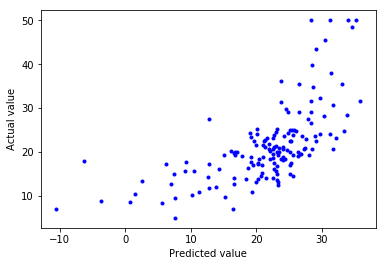

In [181]:
# h = X.dot(theta.T)
plt.plot(y_pred, y_test, 'b.')
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
plt.show()

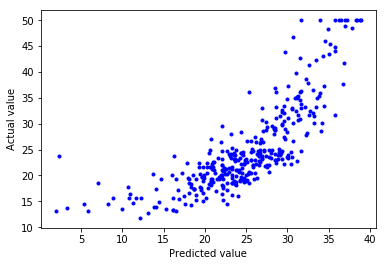

PRICE    25.759613
dtype: float64


In [15]:
h = X.dot(theta.T)
plt.plot(h, y_train, 'b.')
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
plt.show()

print(mean_squared_error(h, y_train))

In [185]:
# comparing with a linear regression model using scikit learn

lm = LinearRegression()
lm.fit(x_train, y_train)

y_predict = lm.predict(x_test)

print(lm.score(x_test, y_test))
print(mean_squared_error(y_test, y_predict))

0.7109203586326183
21.540218943932437
